## Oil Price Graph

In [1]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
oil = quandl.get("NSE/OIL", authtoken="vEjGTysiCFBuN-z5bjGP",#insert you api token
                 start_date="1980-01-01",
                 end_date="2020-01-01")

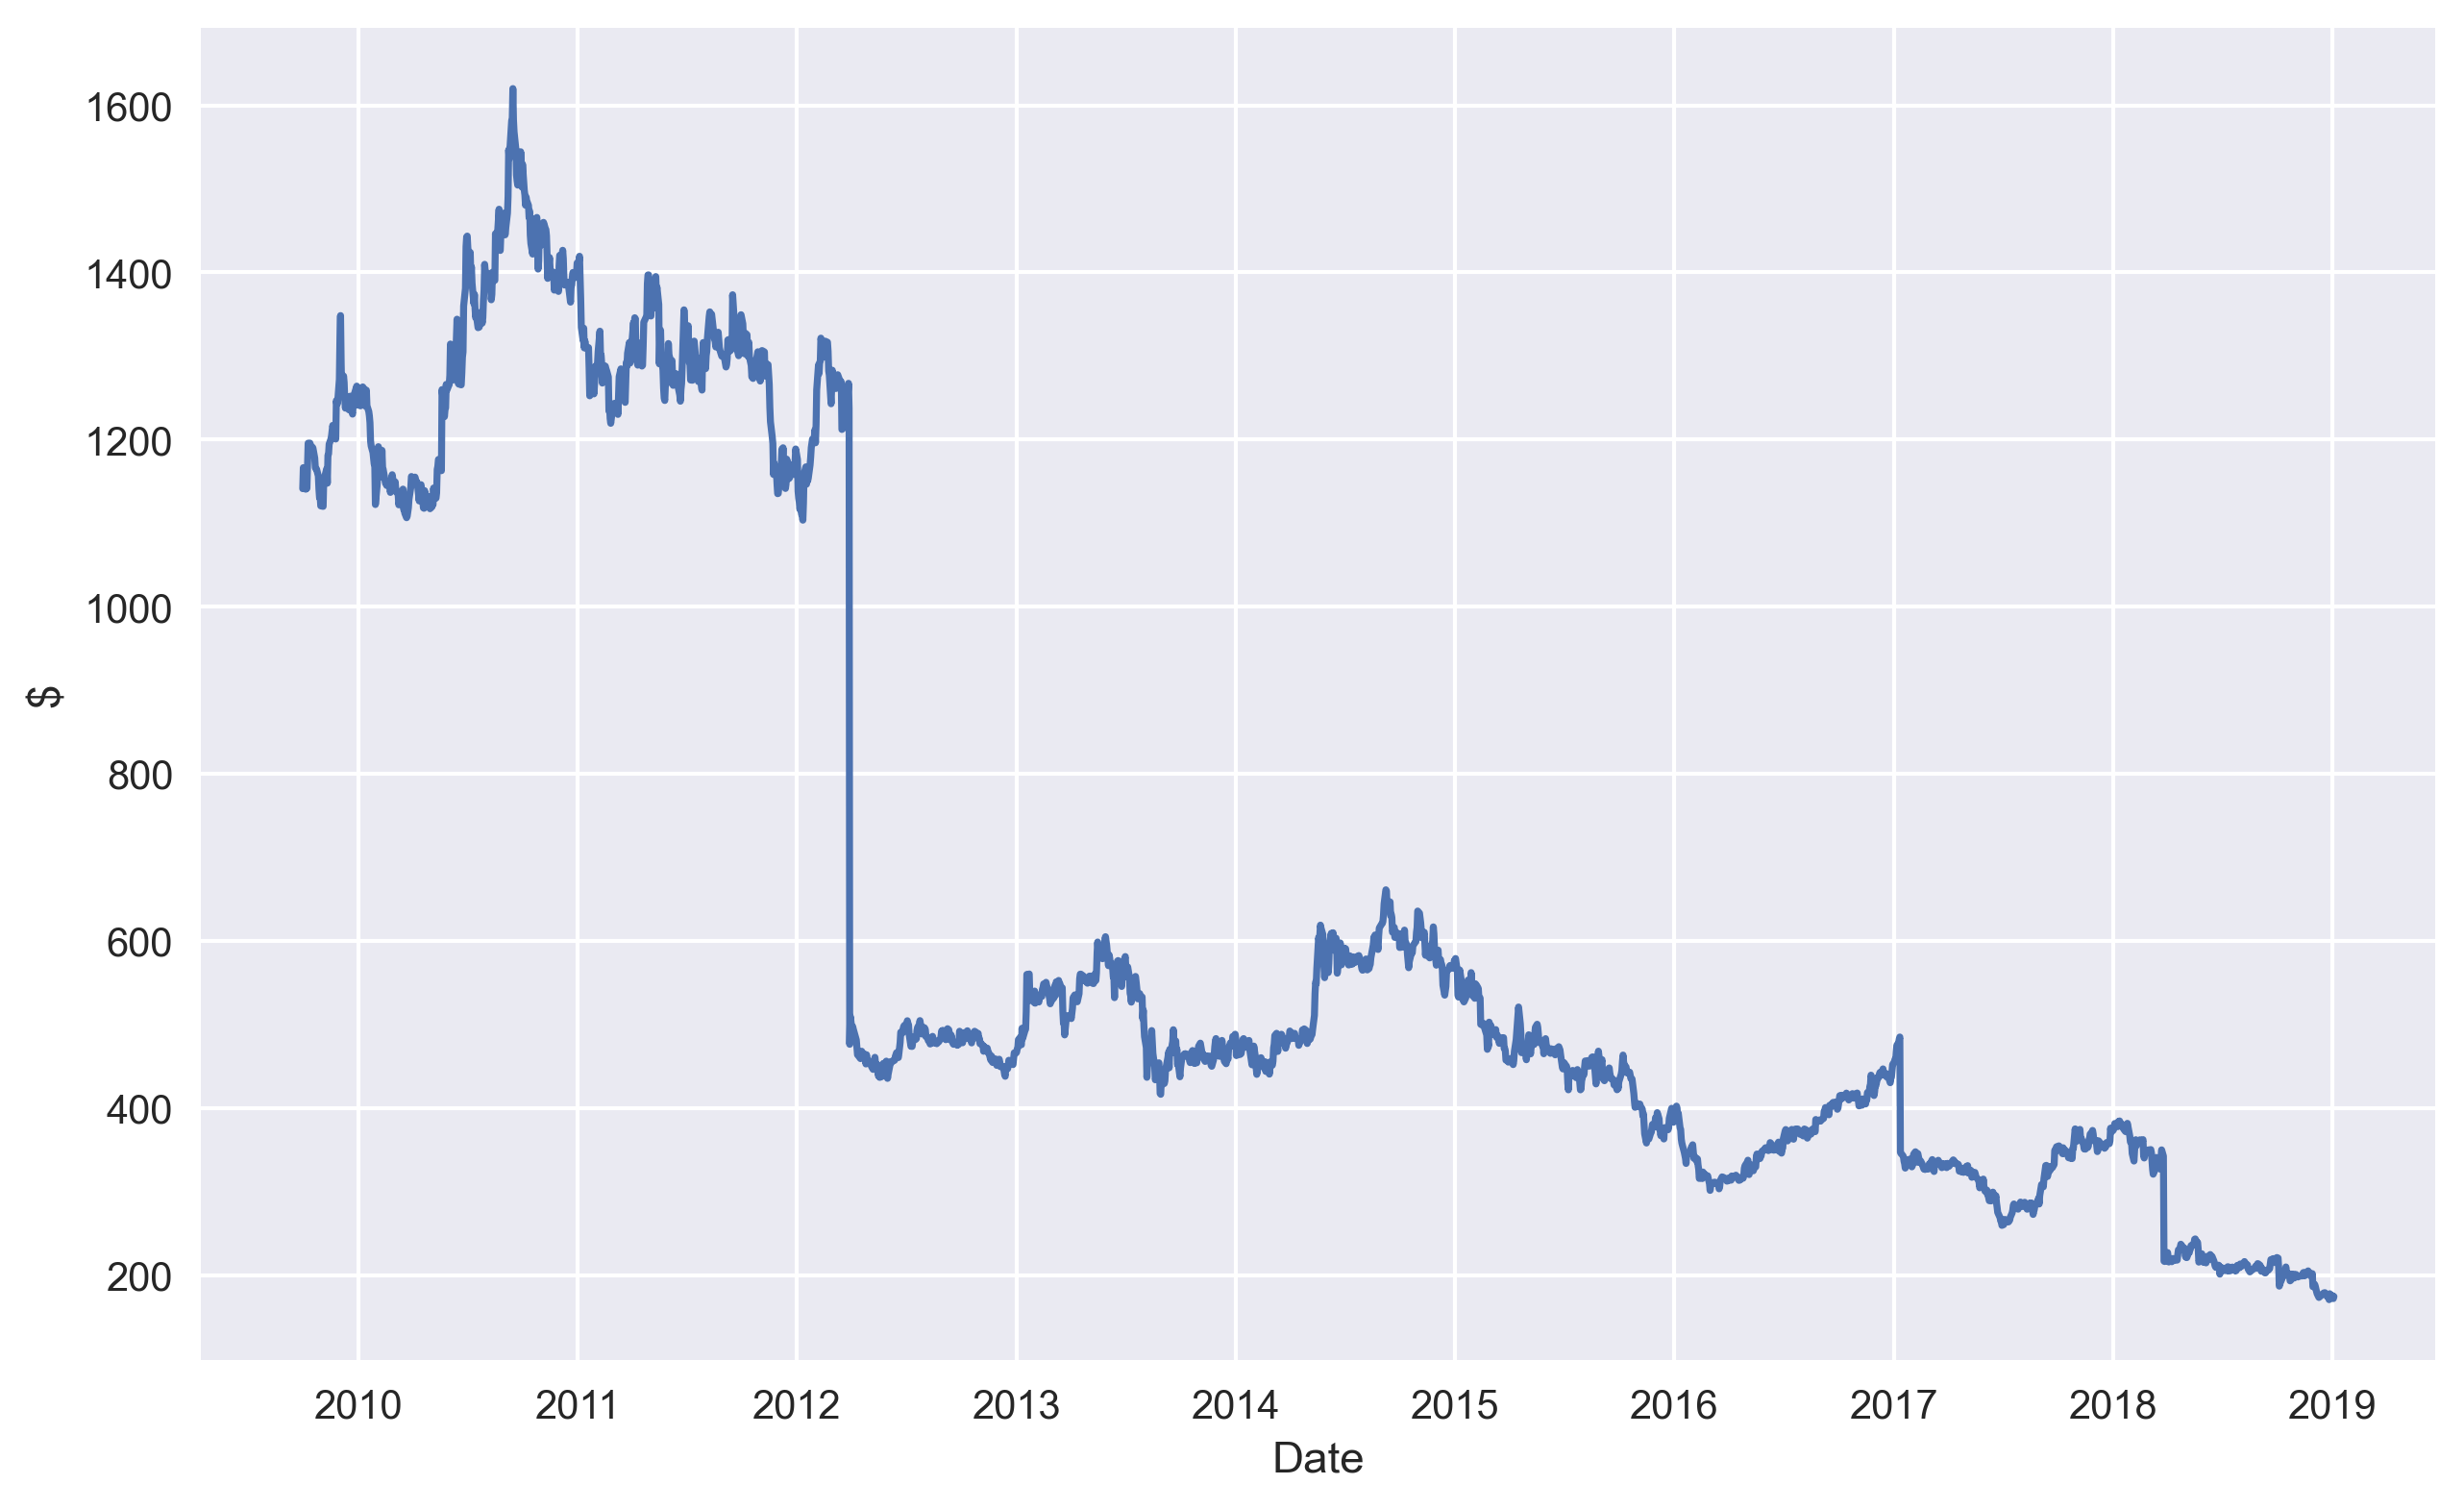

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## Trend

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
ticker = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo')\
            .Close

[*********************100%***********************]  1 of 1 completed


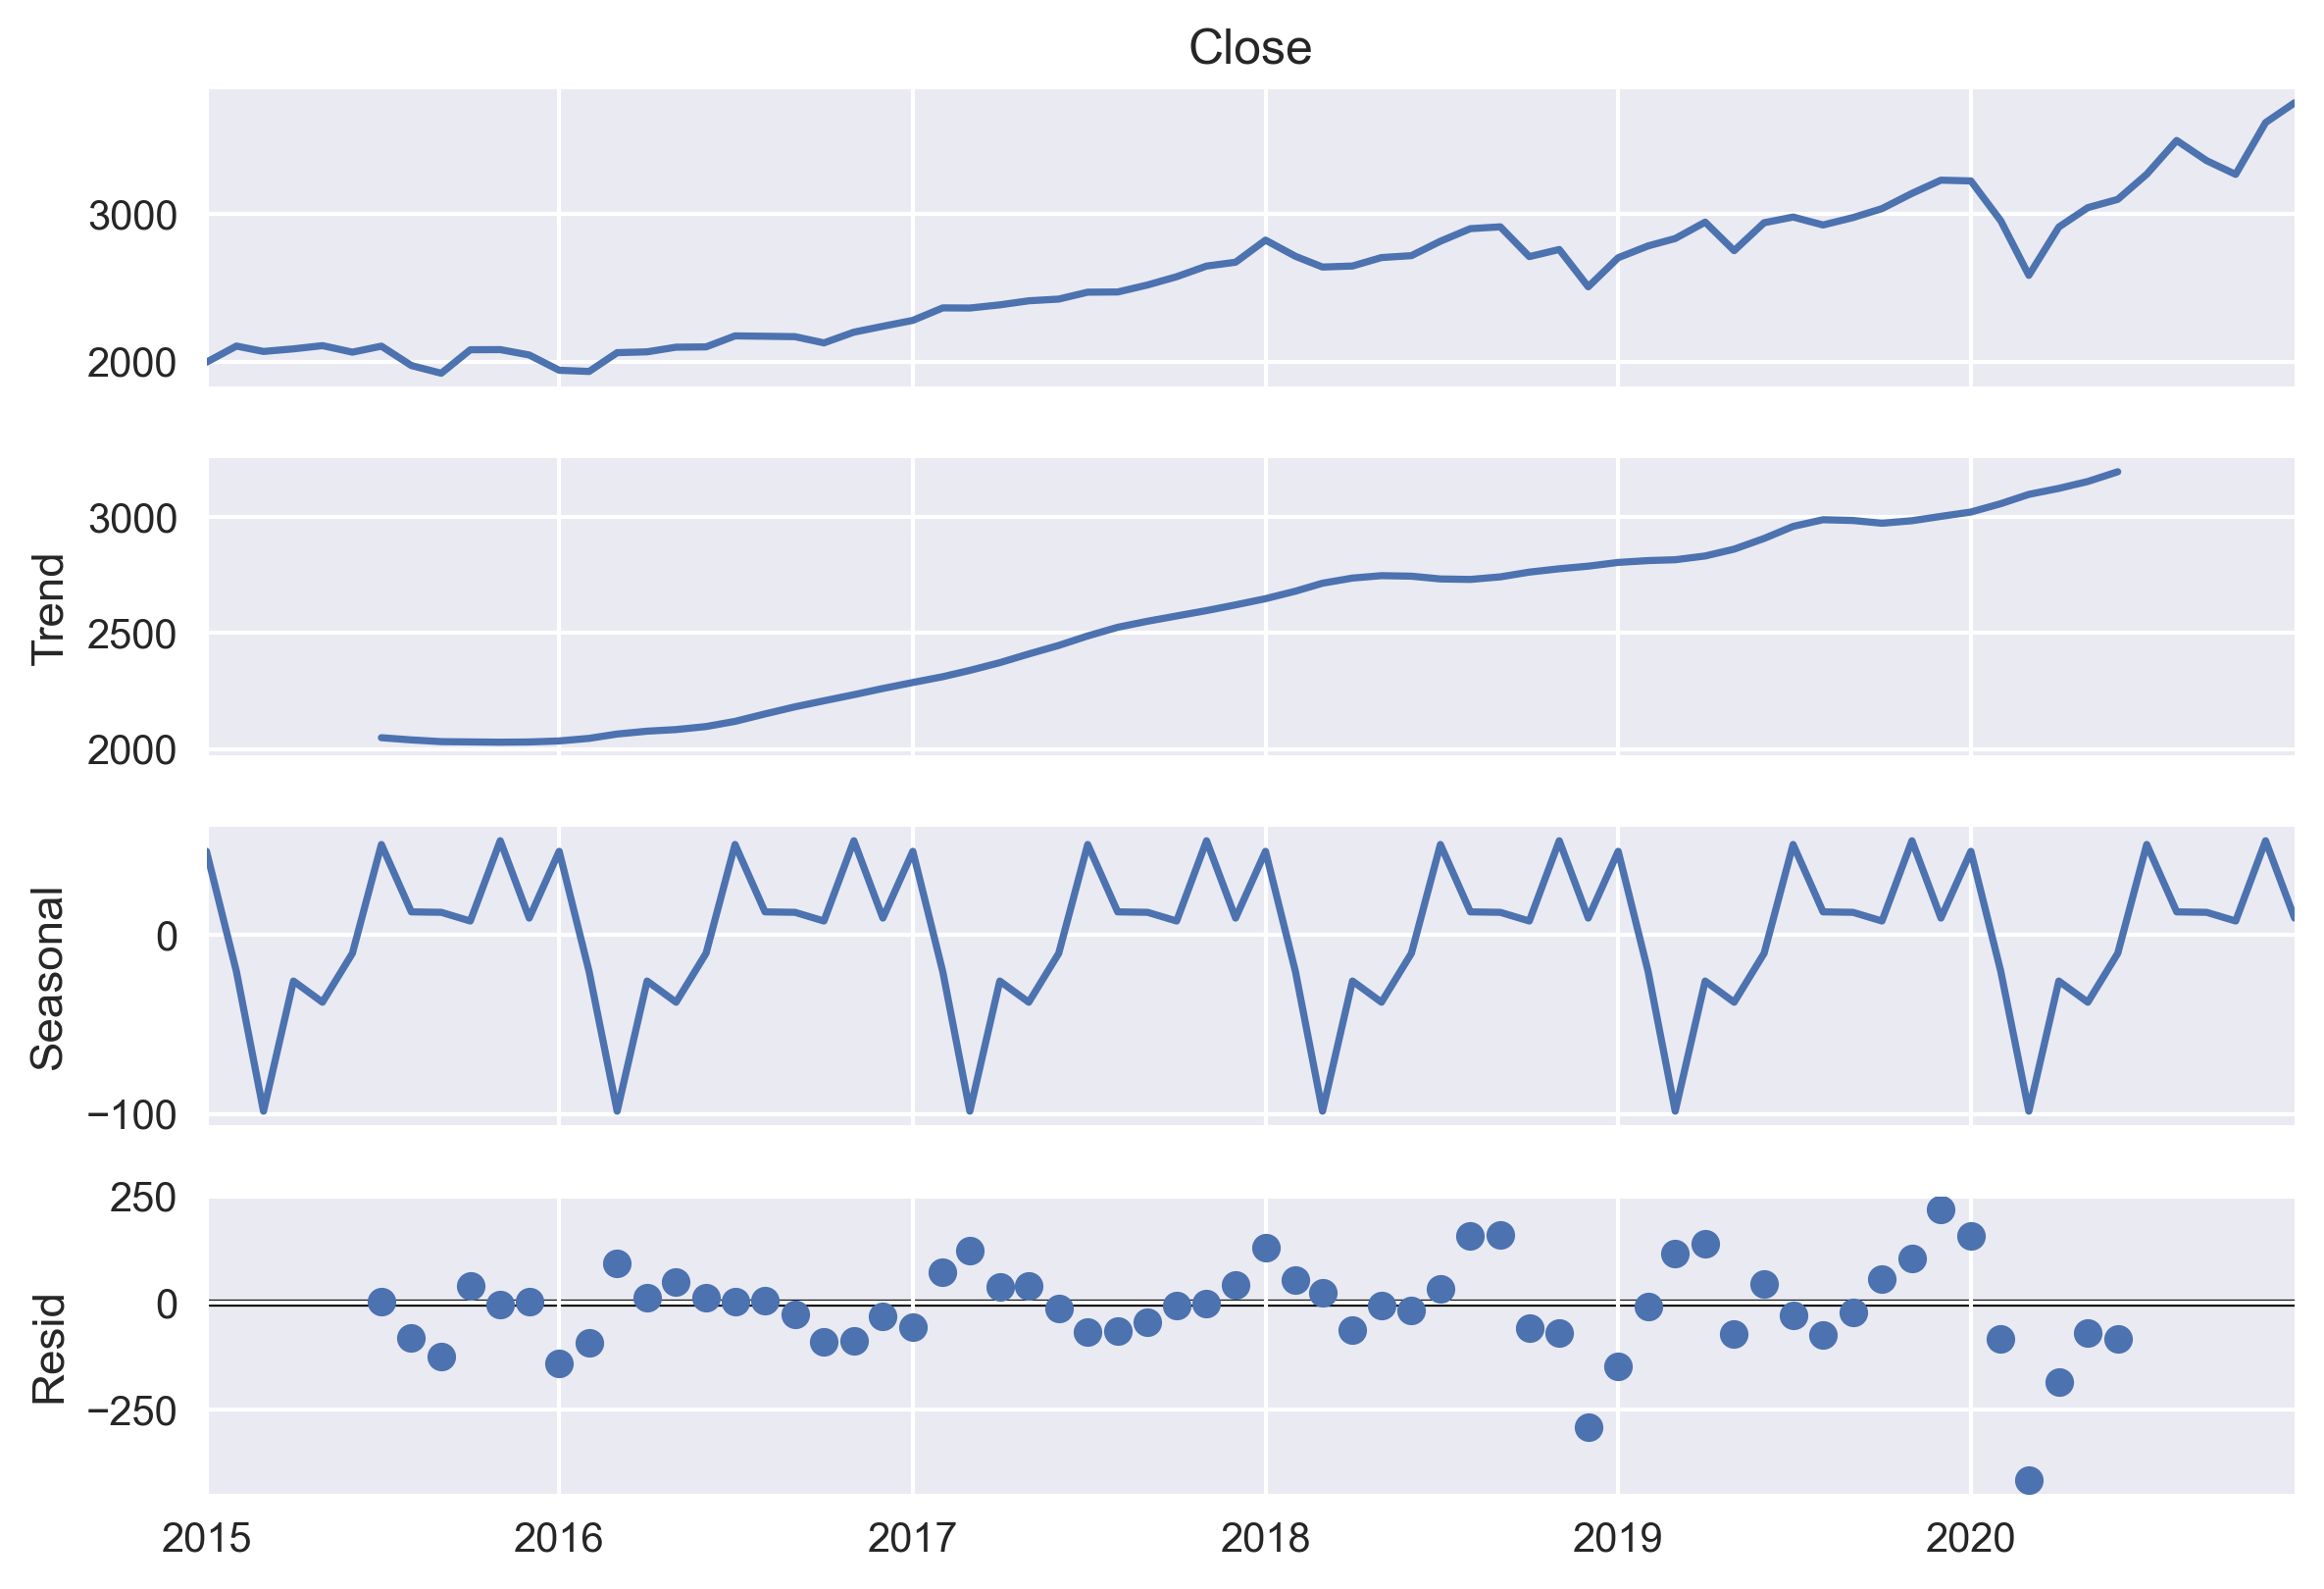

In [6]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

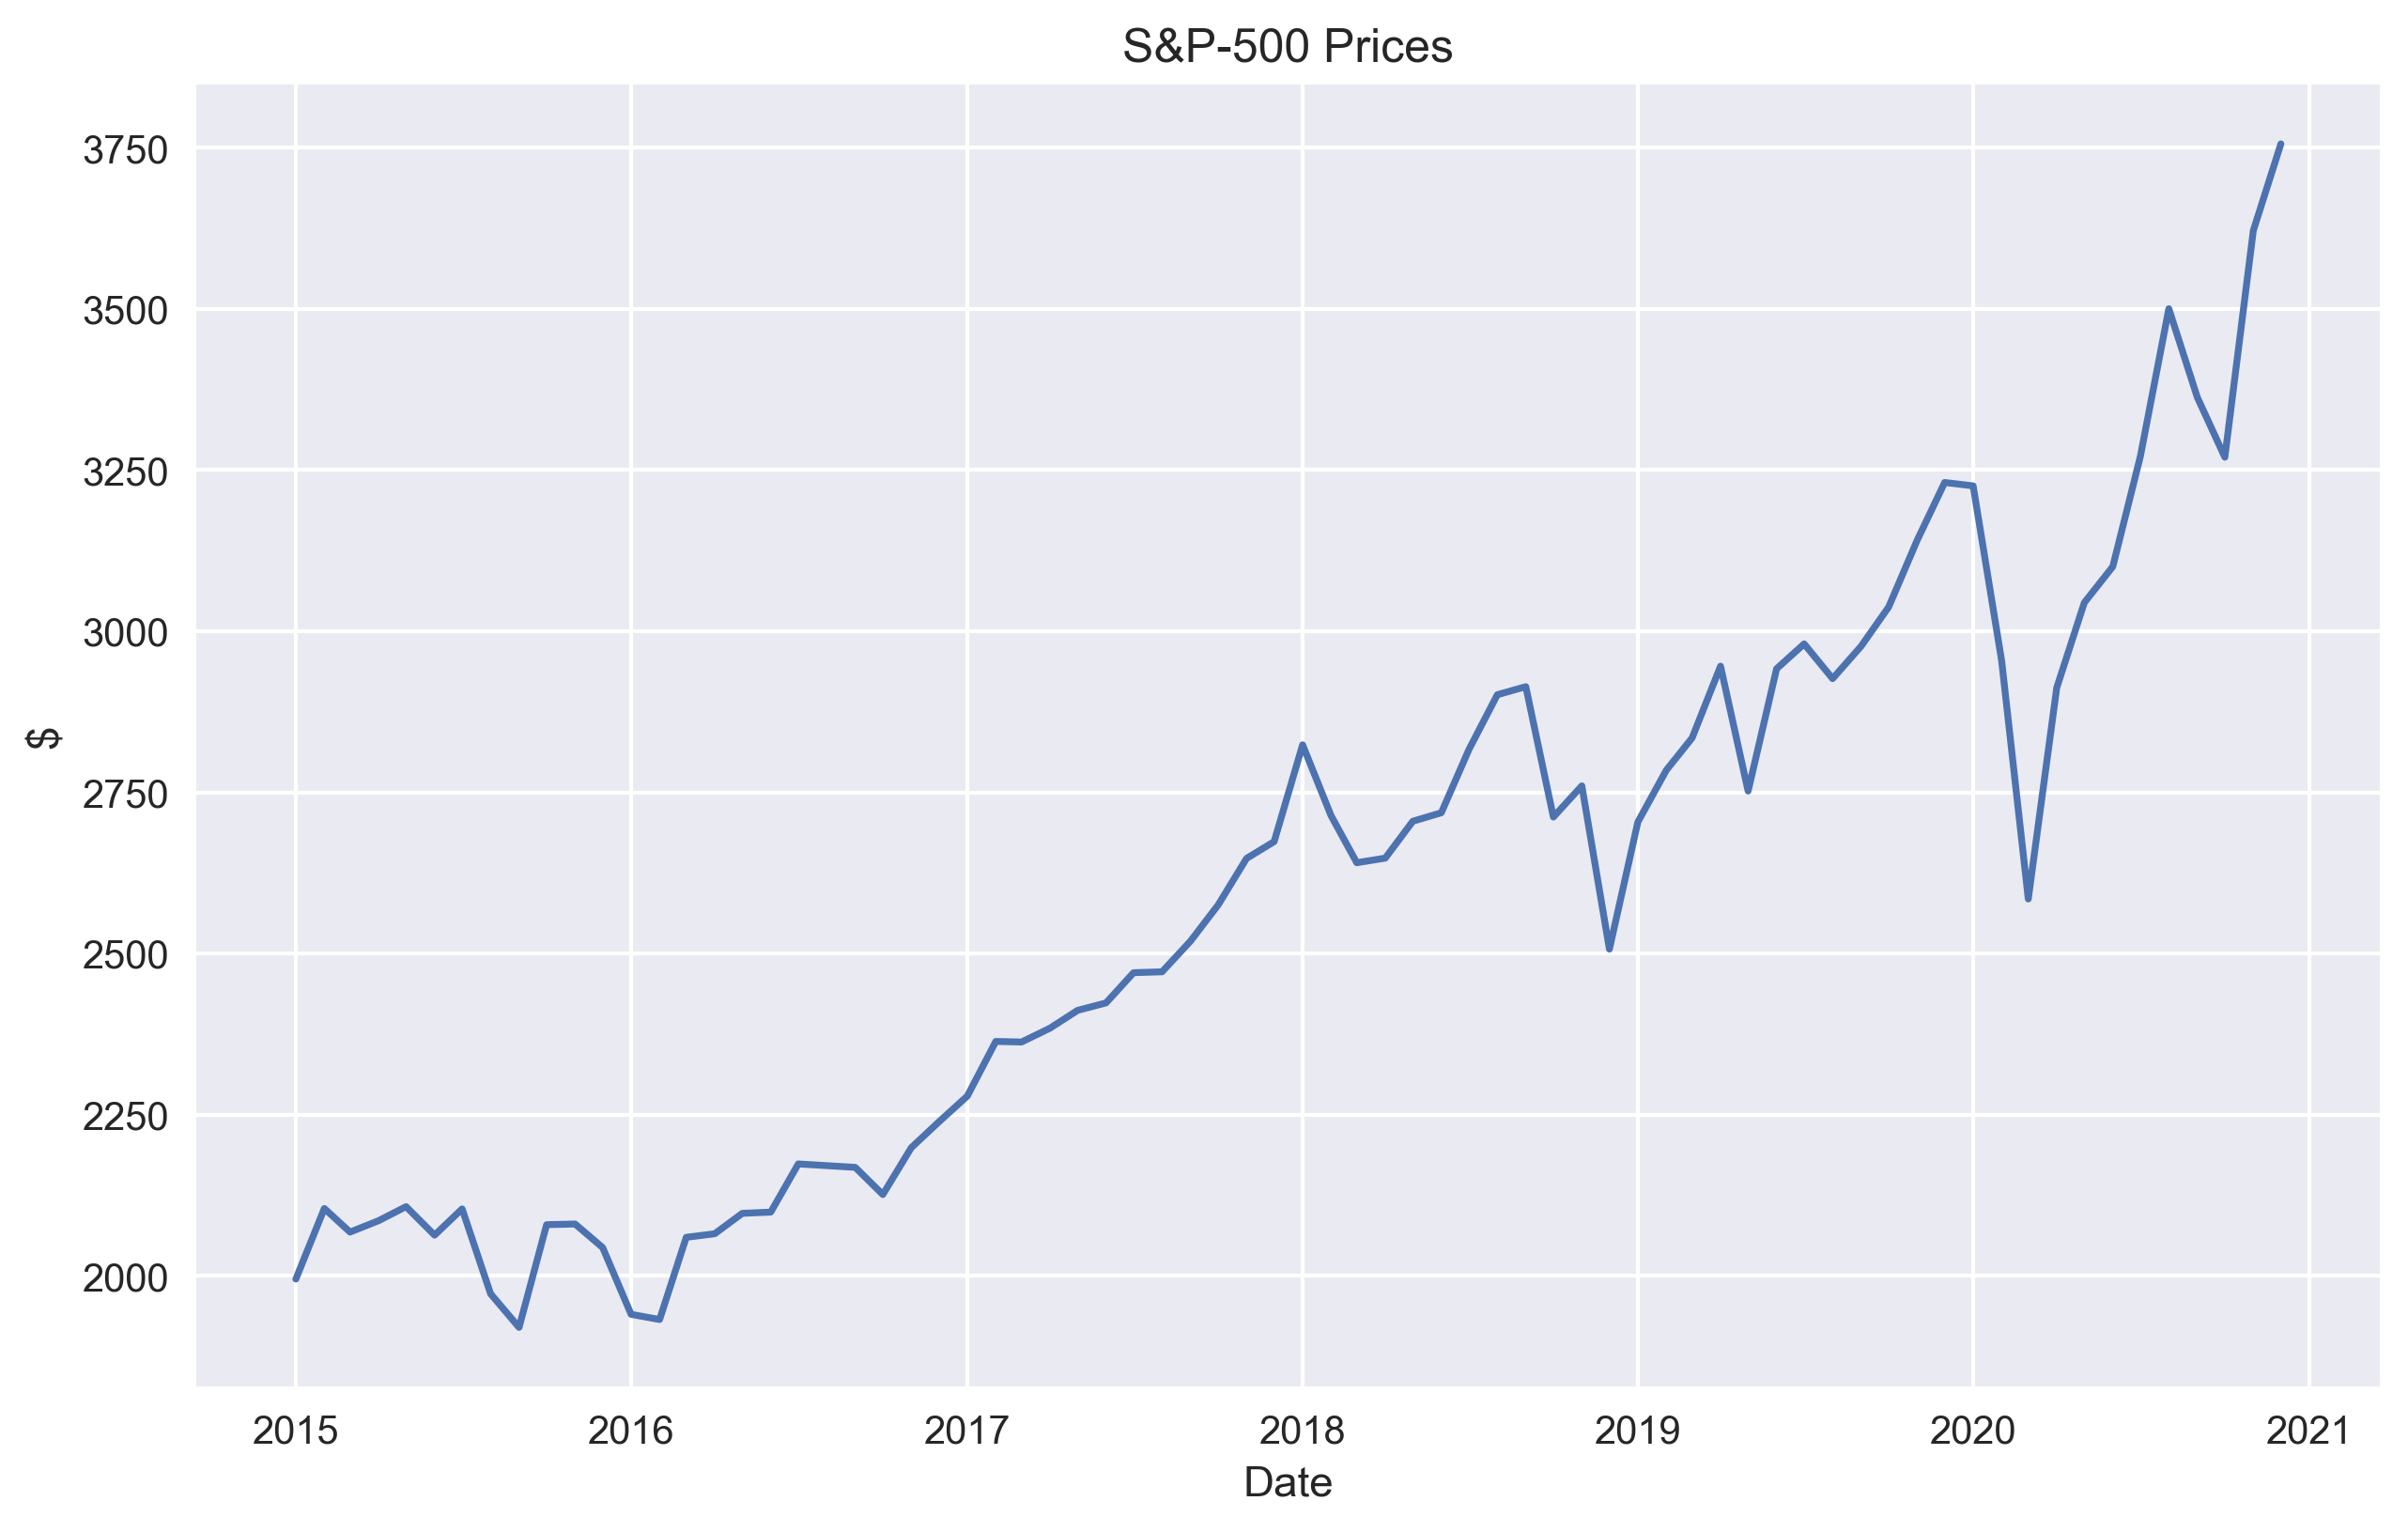

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

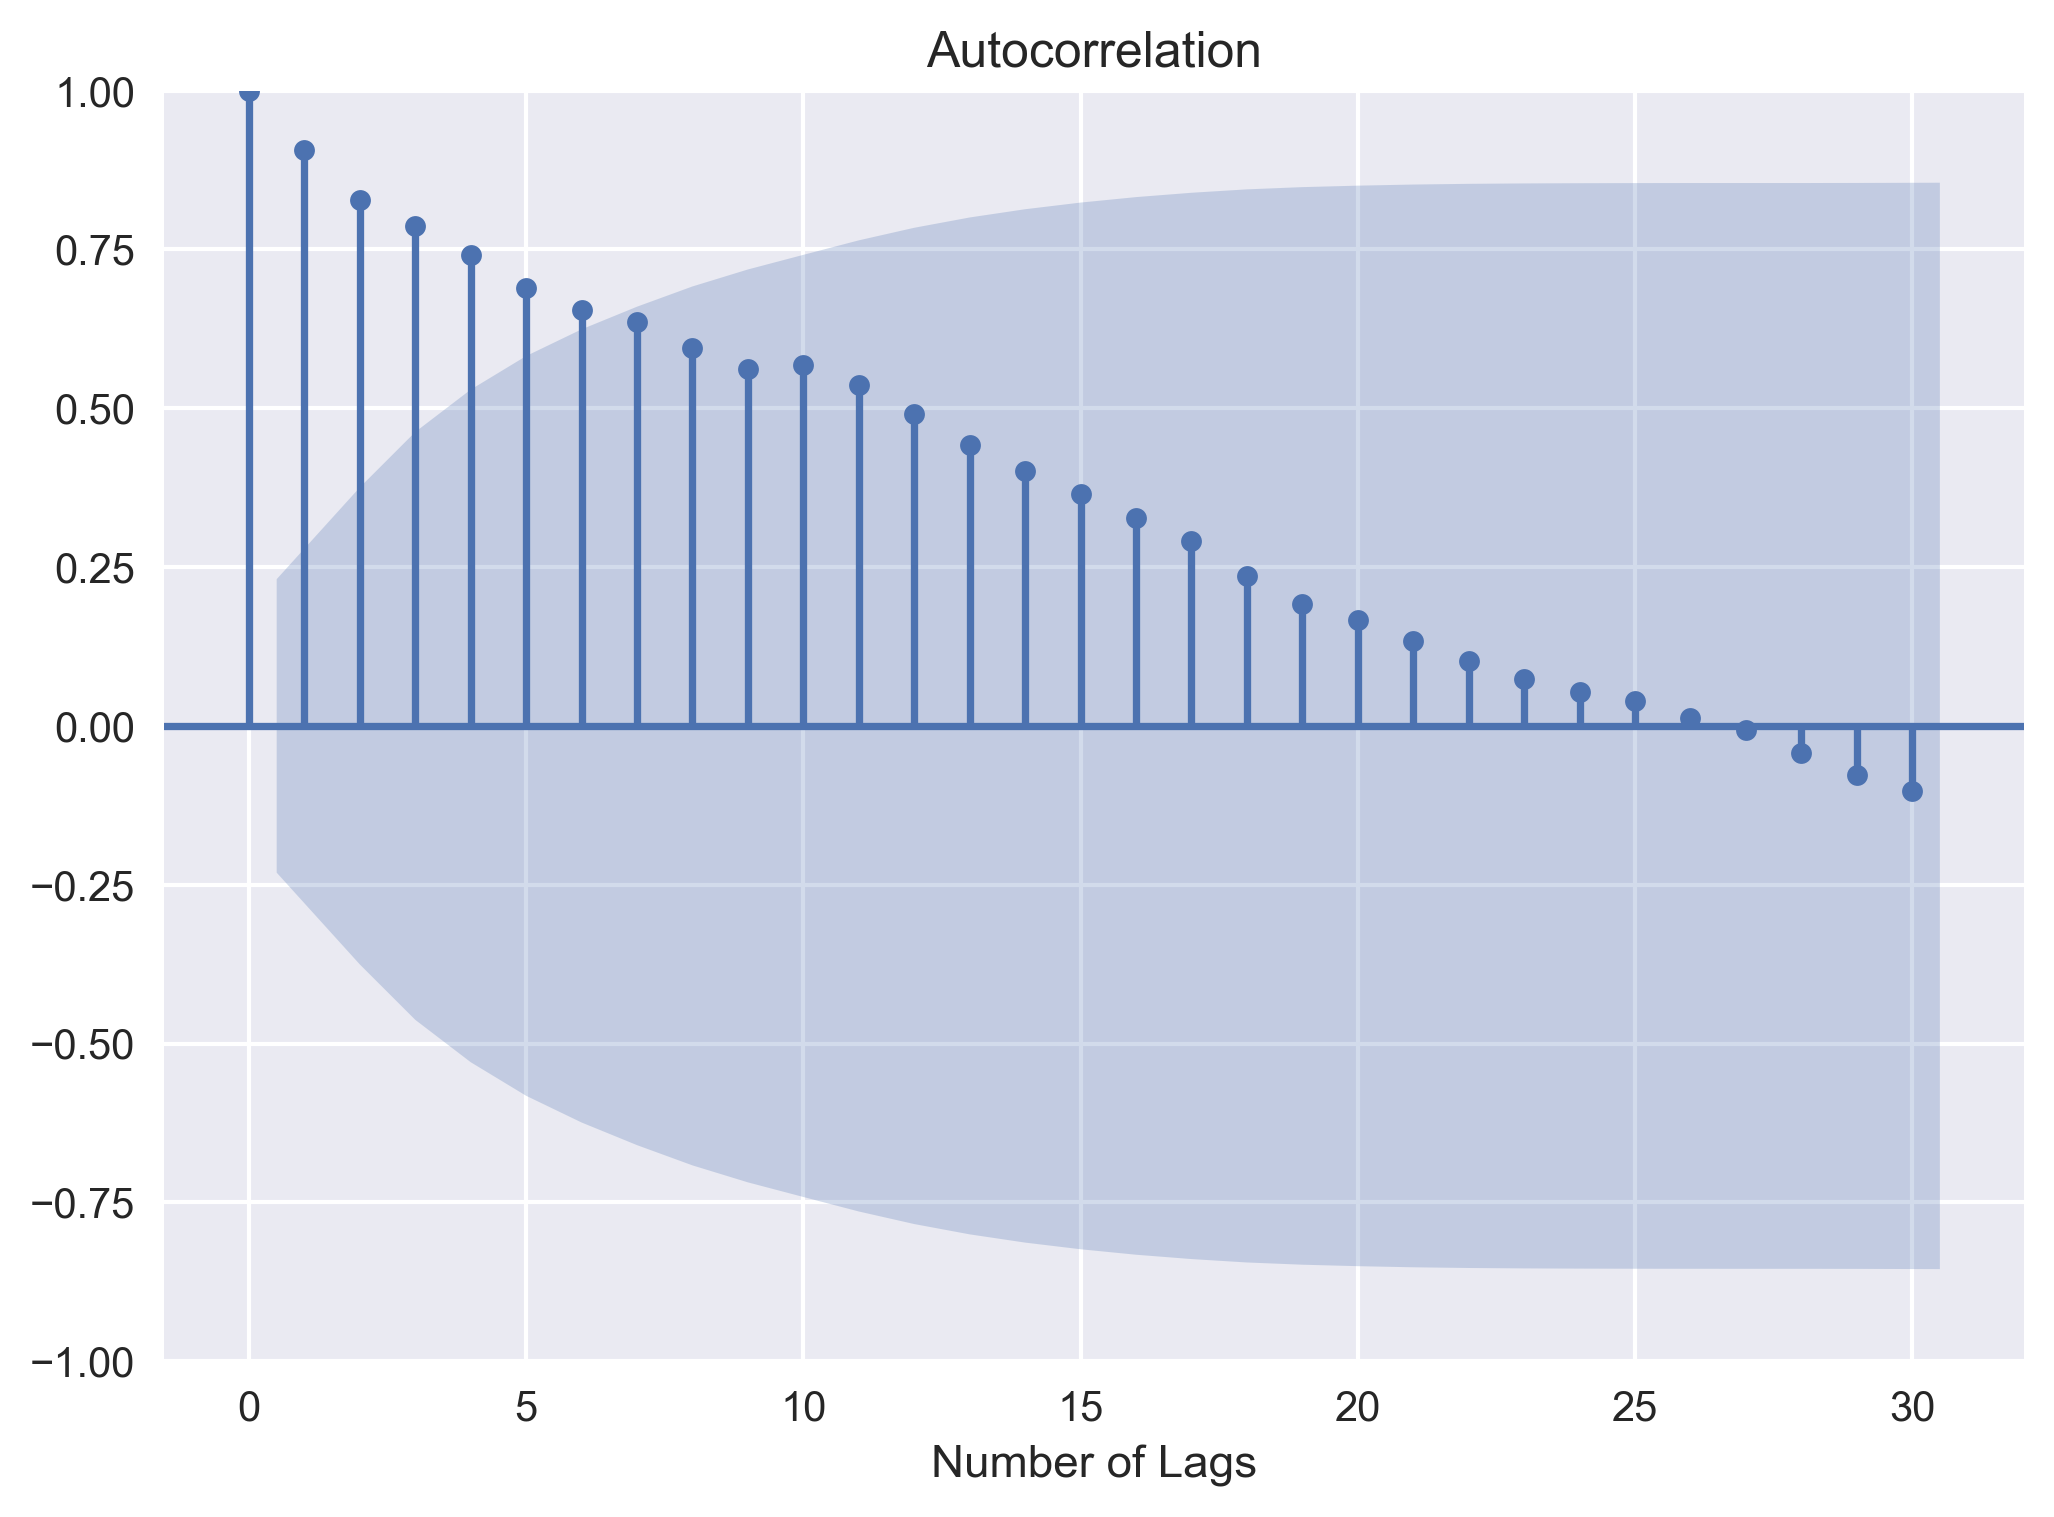

In [8]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

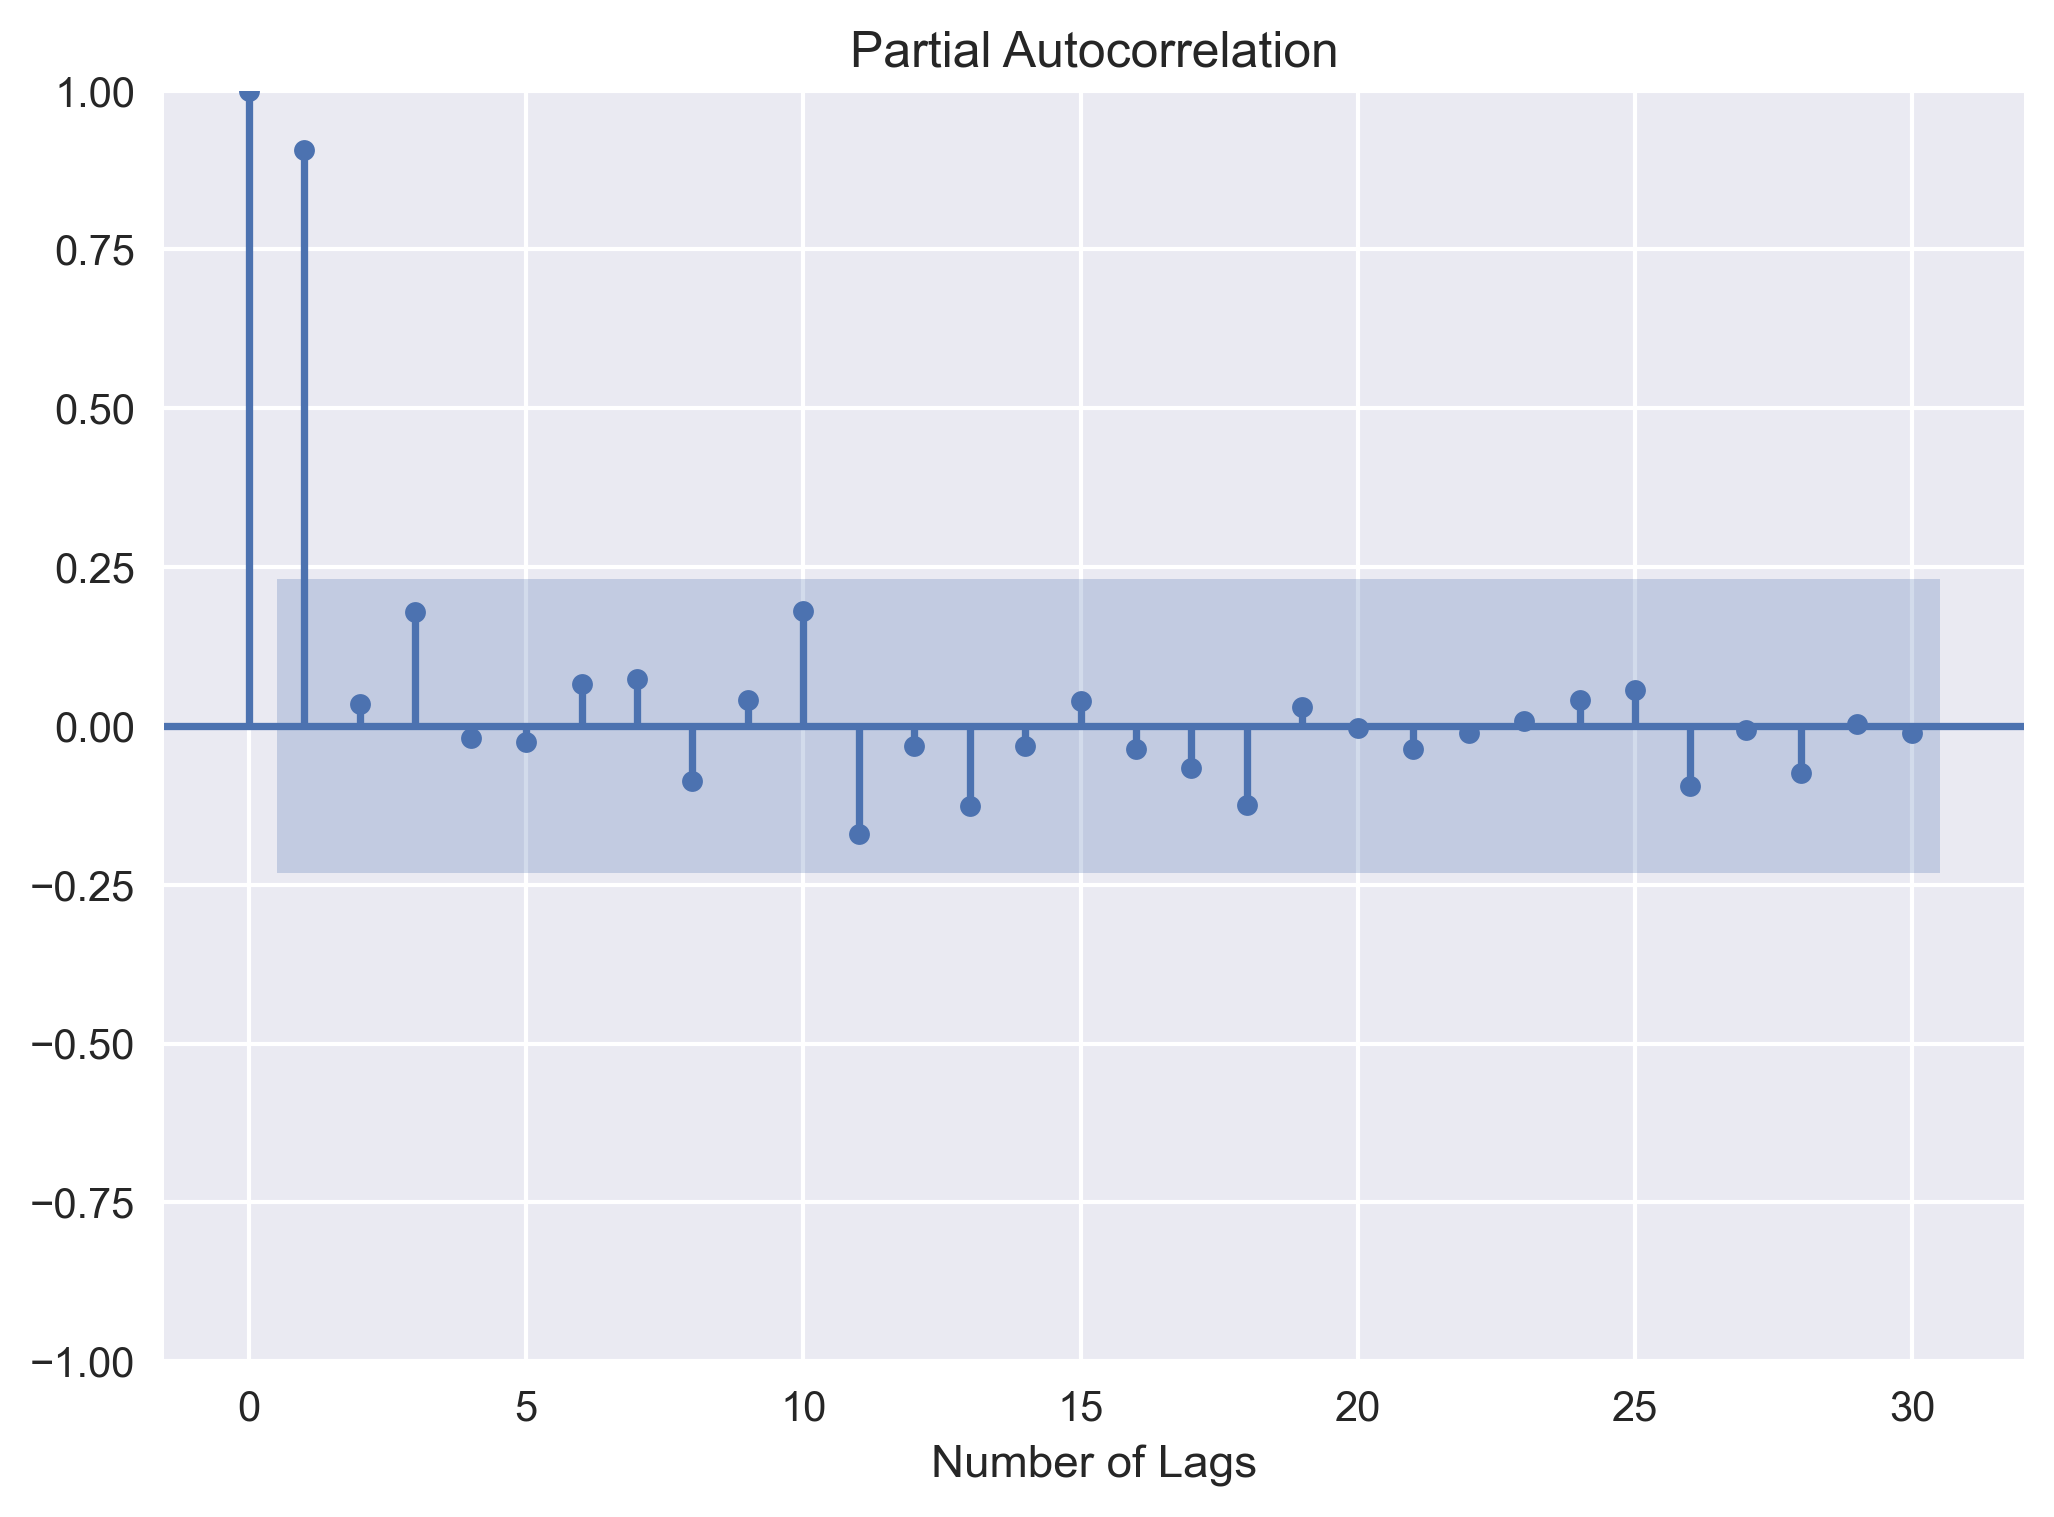

In [9]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

 ## Seasonality

In [10]:
from fredapi import Fred
import statsmodels.api as sm

In [11]:
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#insert you api key

In [12]:
energy = fred.get_series("CAPUTLG2211A2S", 
                         observation_start="2010-01-01", 
                         observation_end="2020-12-31")
energy.head(12)

2010-01-01    83.6433
2010-02-01    84.8414
2010-03-01    81.9267
2010-04-01    79.3583
2010-05-01    82.6349
2010-06-01    84.2155
2010-07-01    83.4218
2010-08-01    83.5761
2010-09-01    83.5229
2010-10-01    80.6774
2010-11-01    81.5641
2010-12-01    85.7813
dtype: float64

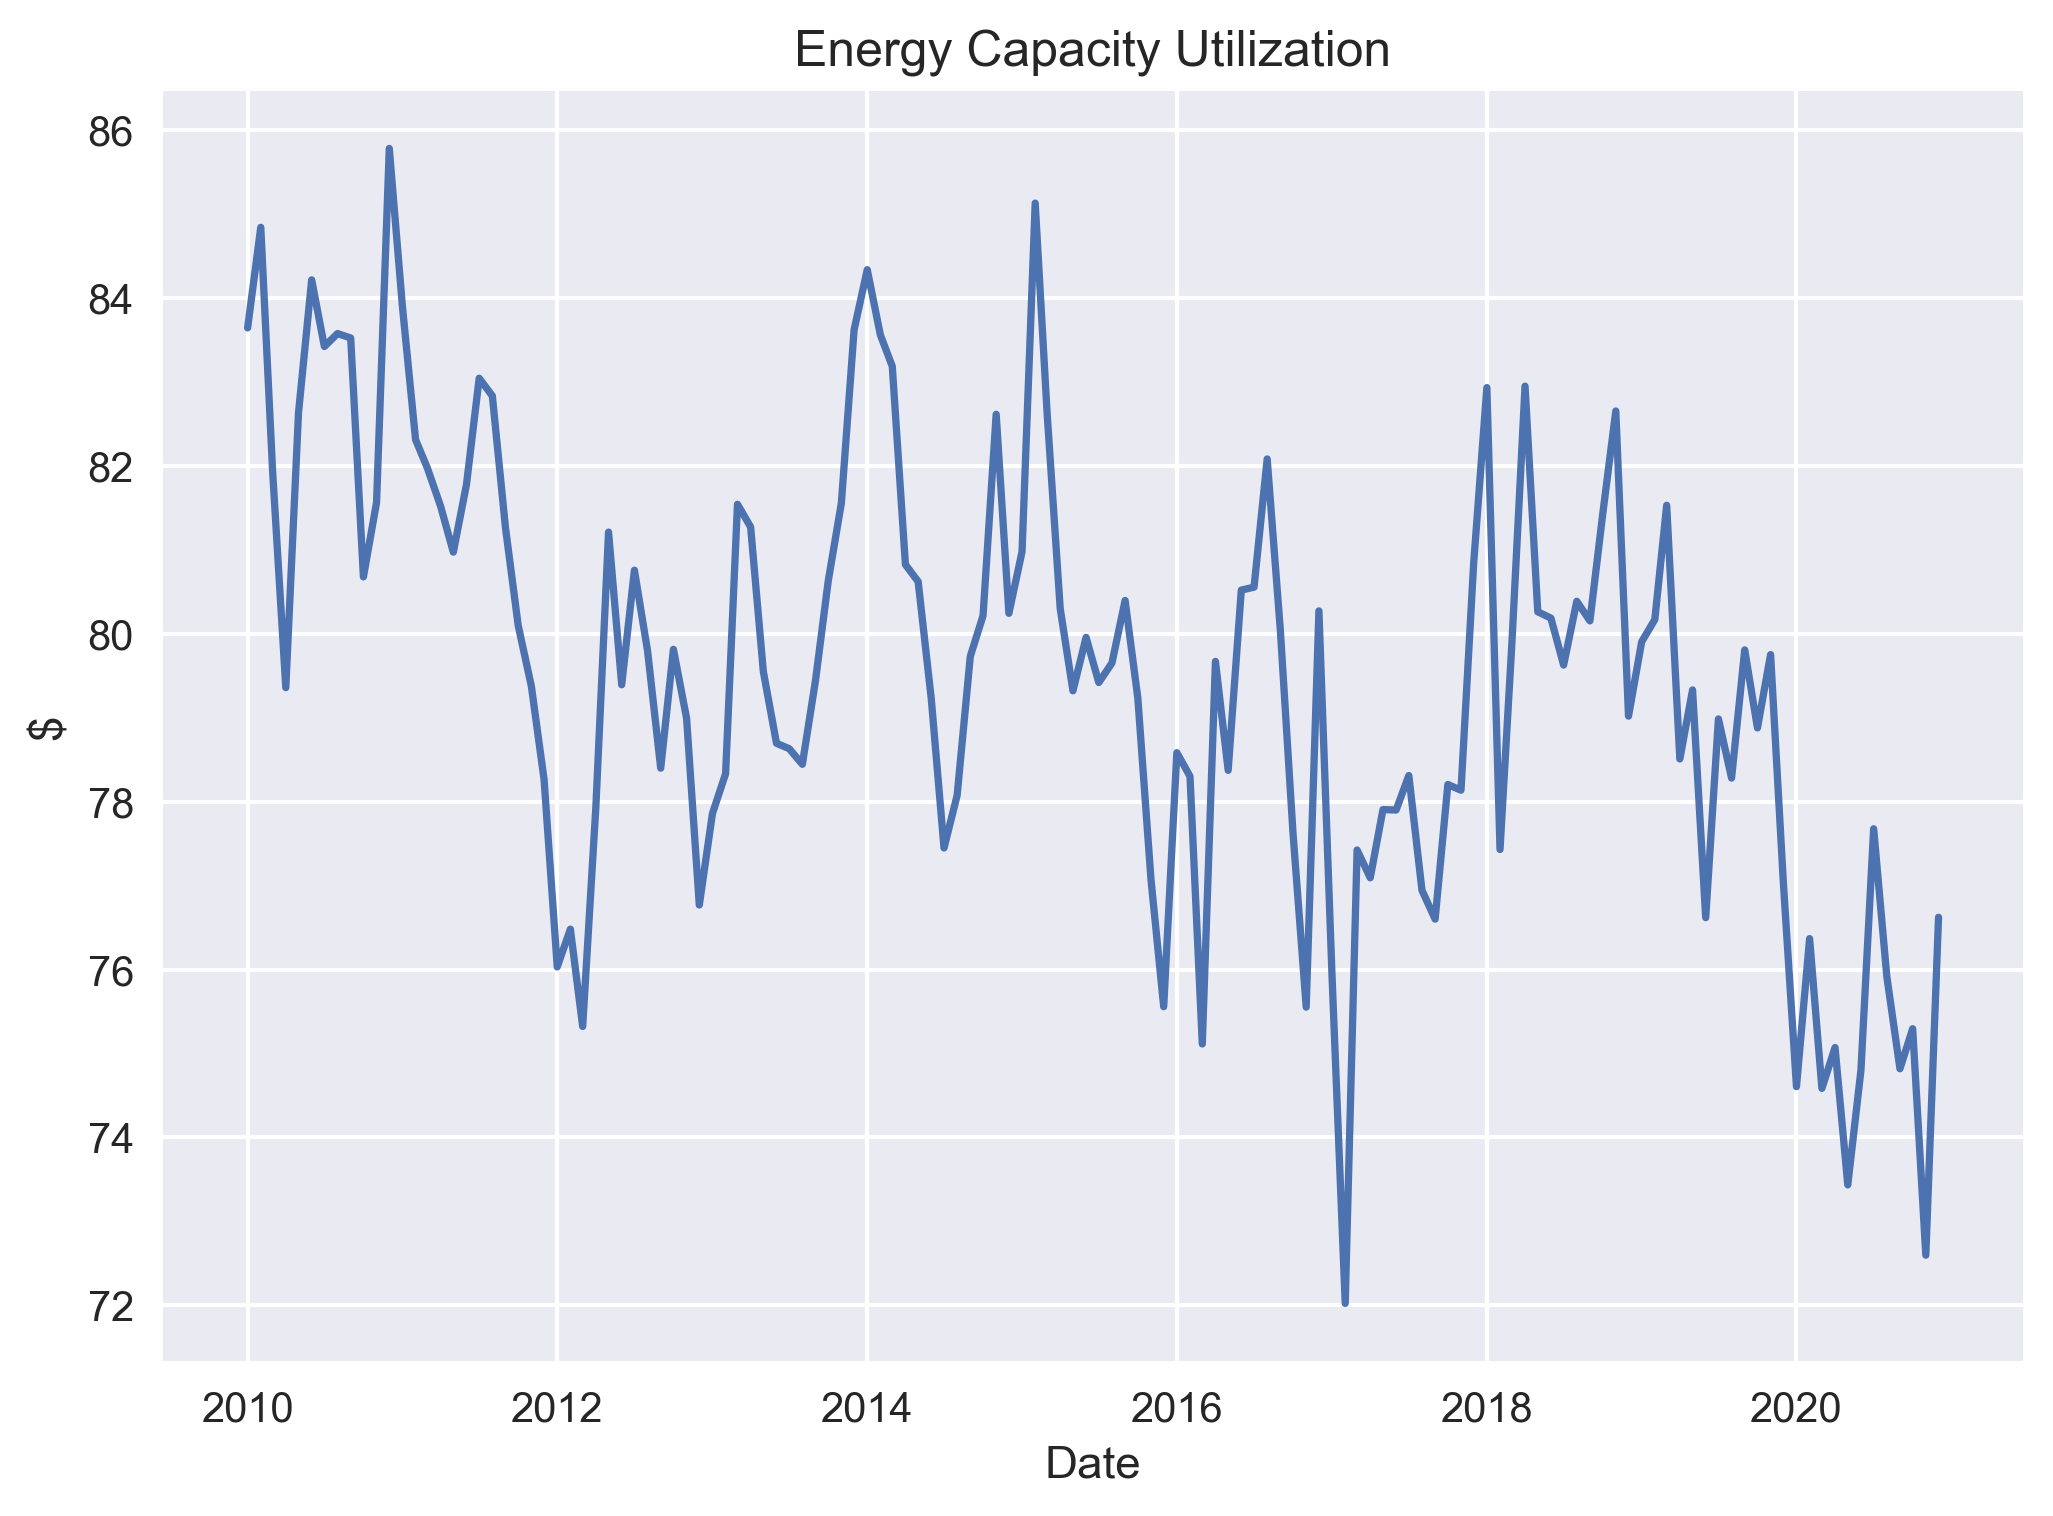

In [13]:
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

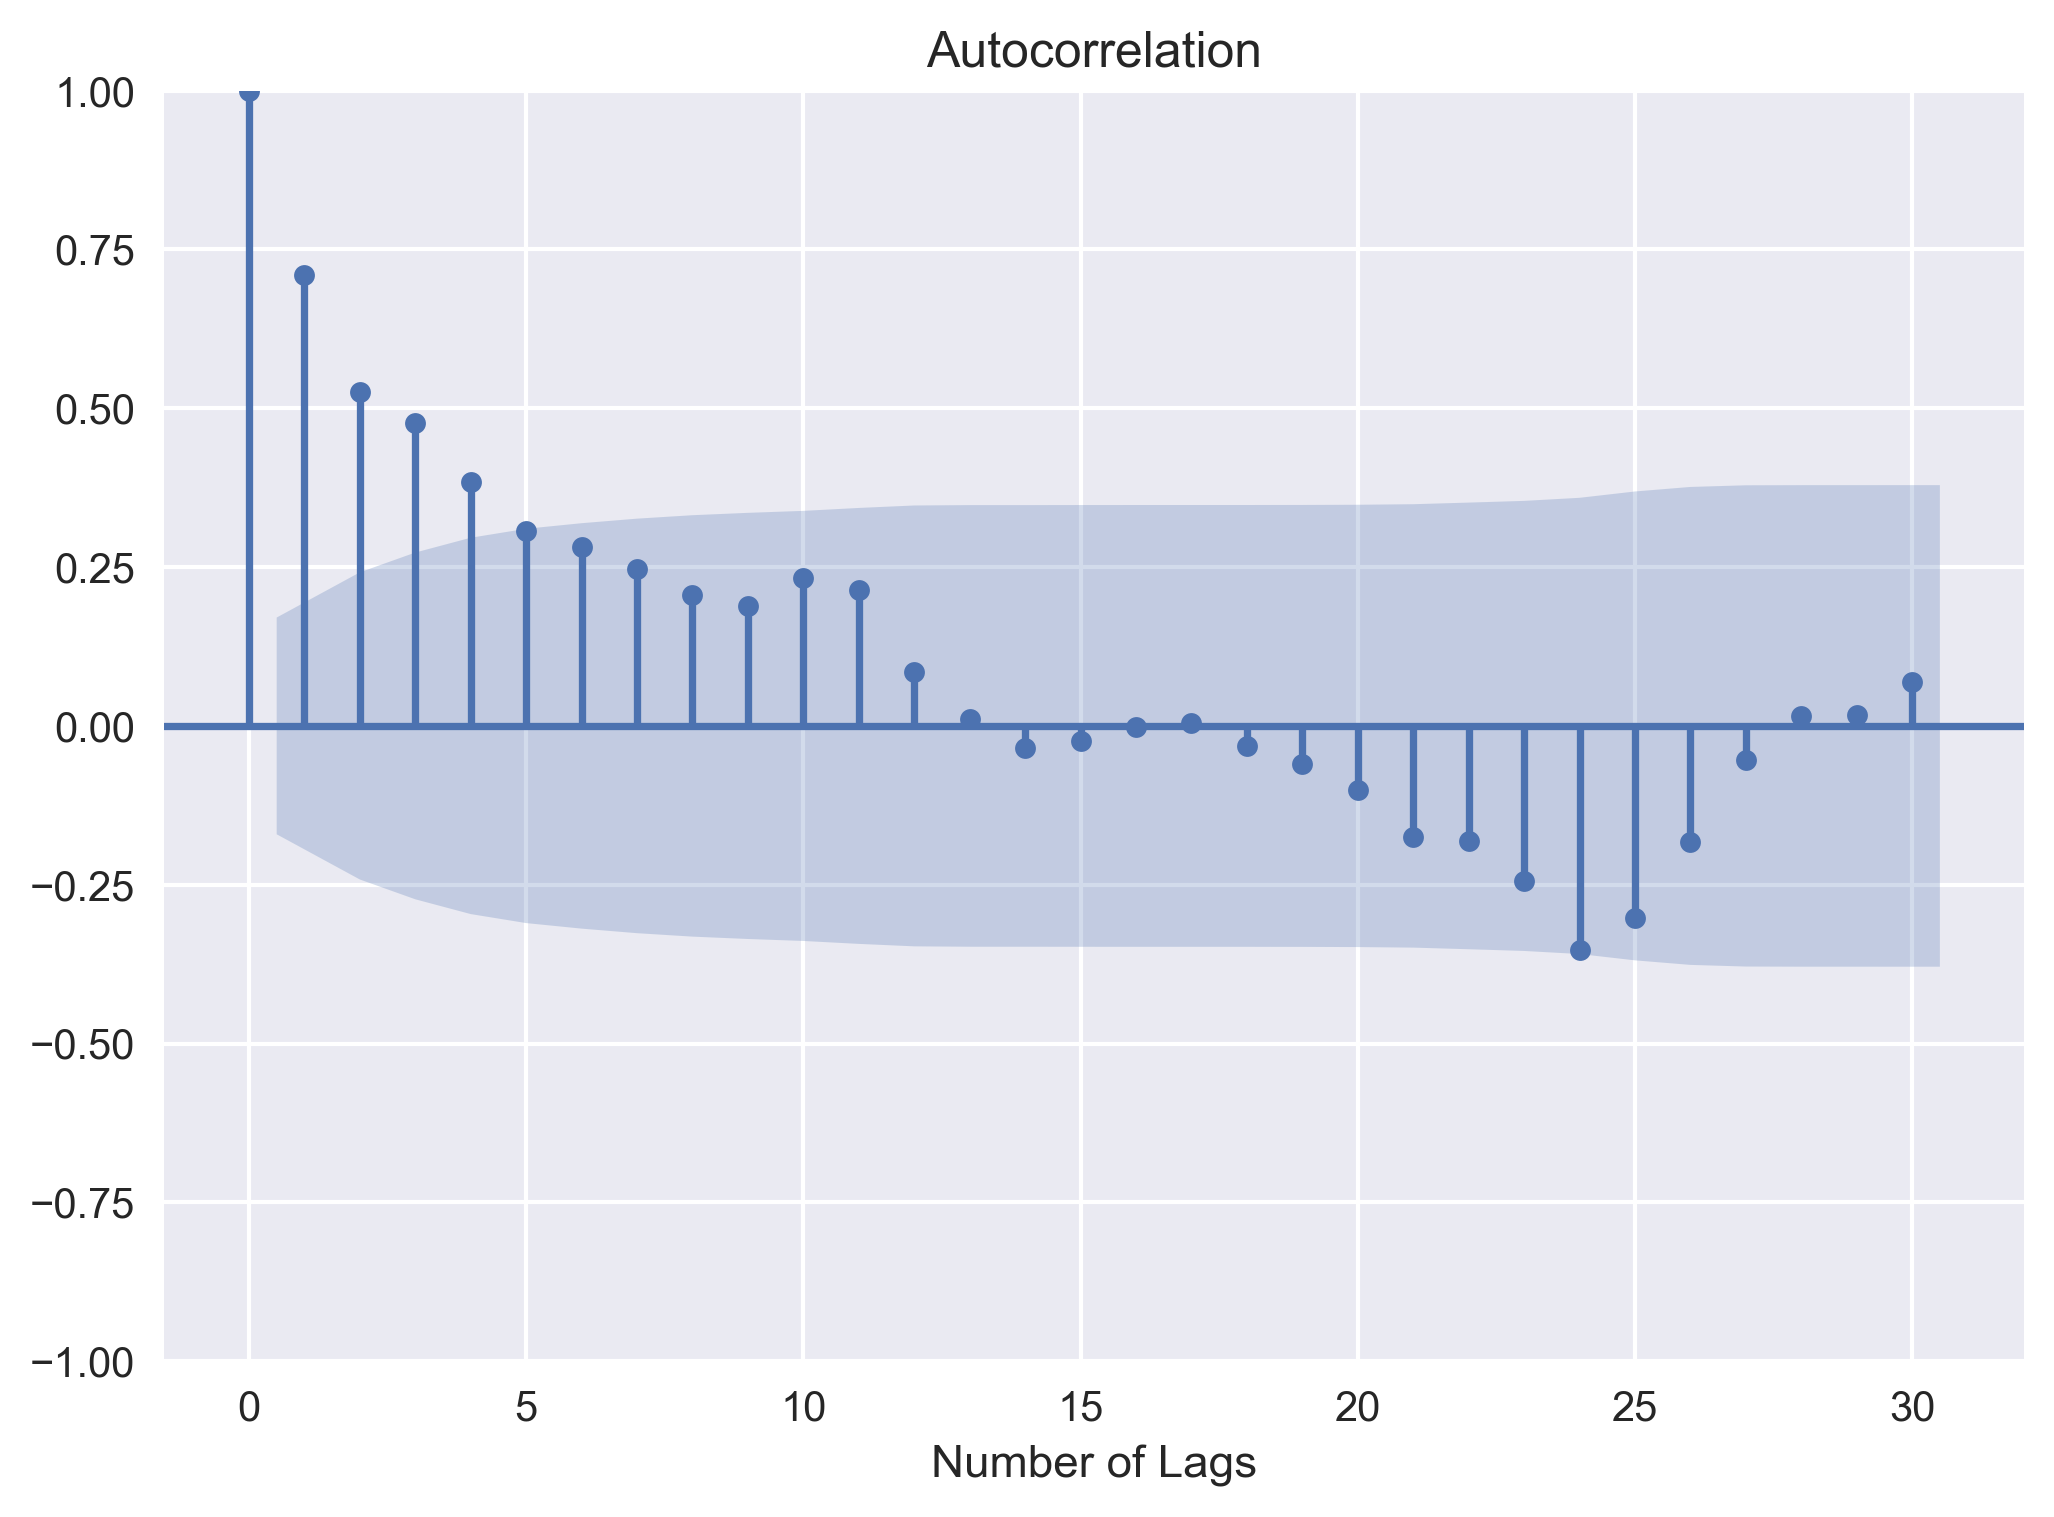

In [14]:
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.show()

## Stationarity

In [15]:
stat_test = adfuller(SP_prices)[0:2]
print("The test statistic and p-value of ADF test are {}"
      .format(stat_test))

The test statistic and p-value of ADF test are (0.03029512007292607, 0.9609669053518538)


In [16]:
diff_SP_price = SP_prices.diff()

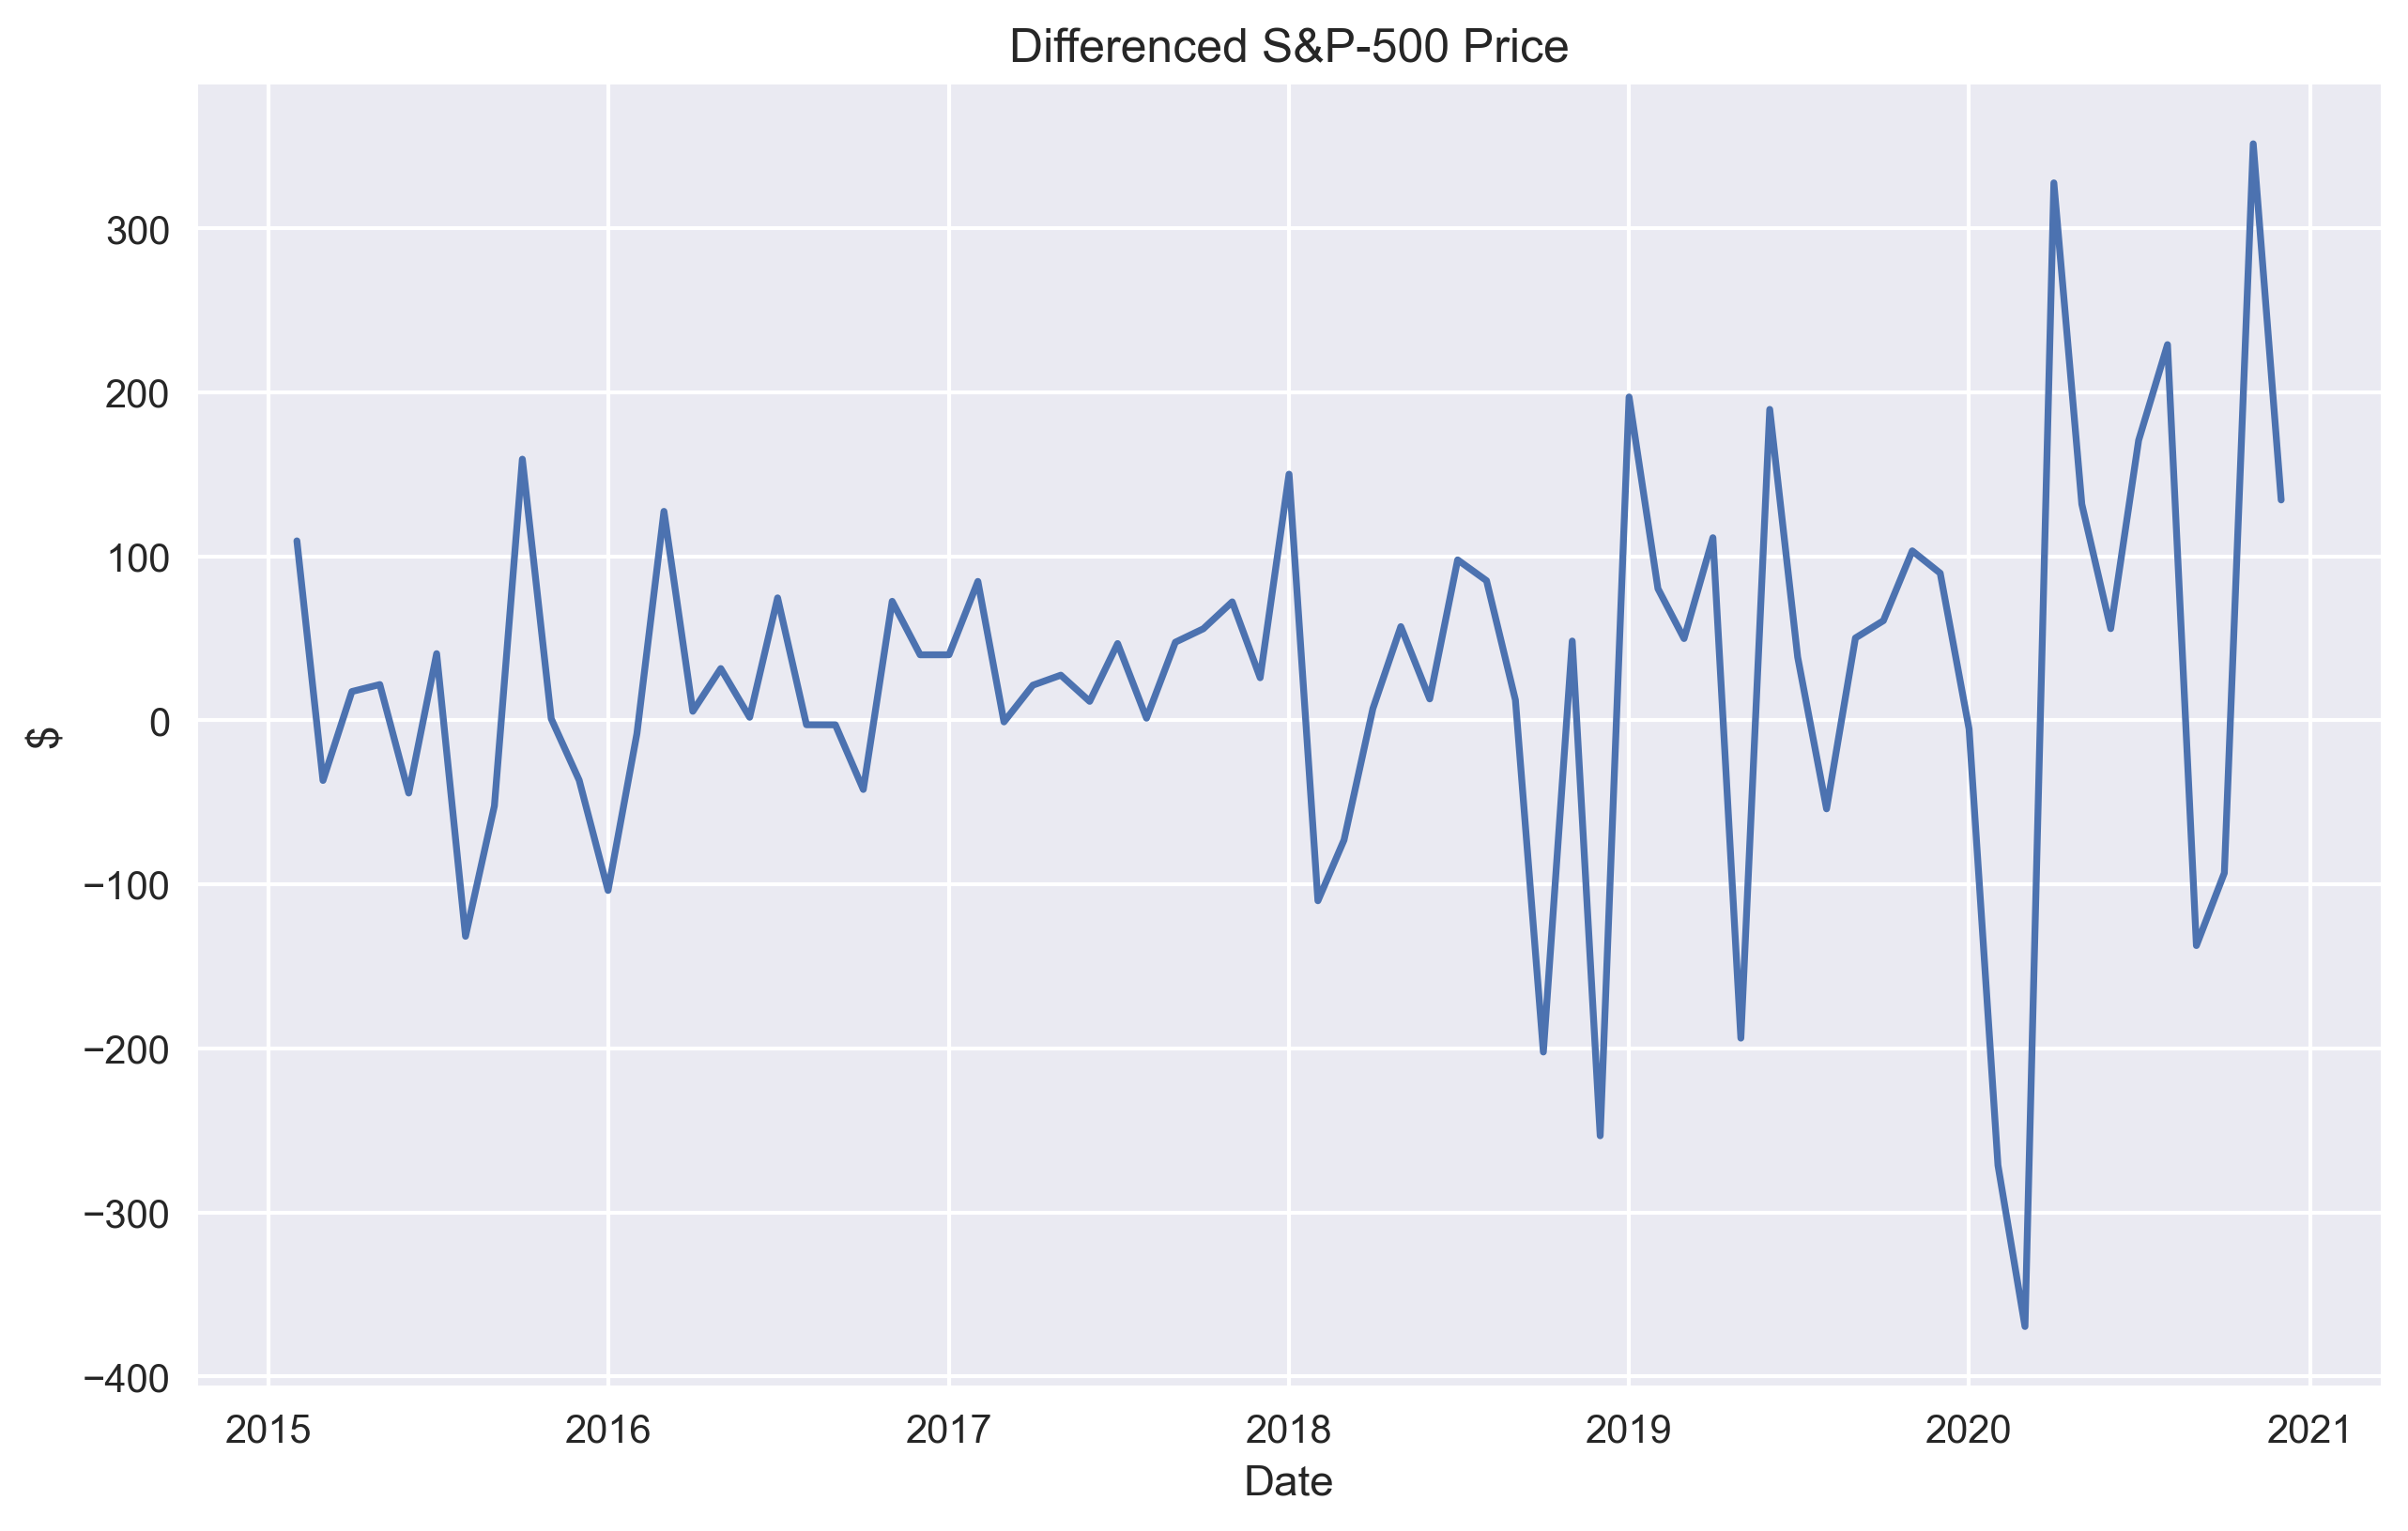

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(diff_SP_price)
plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

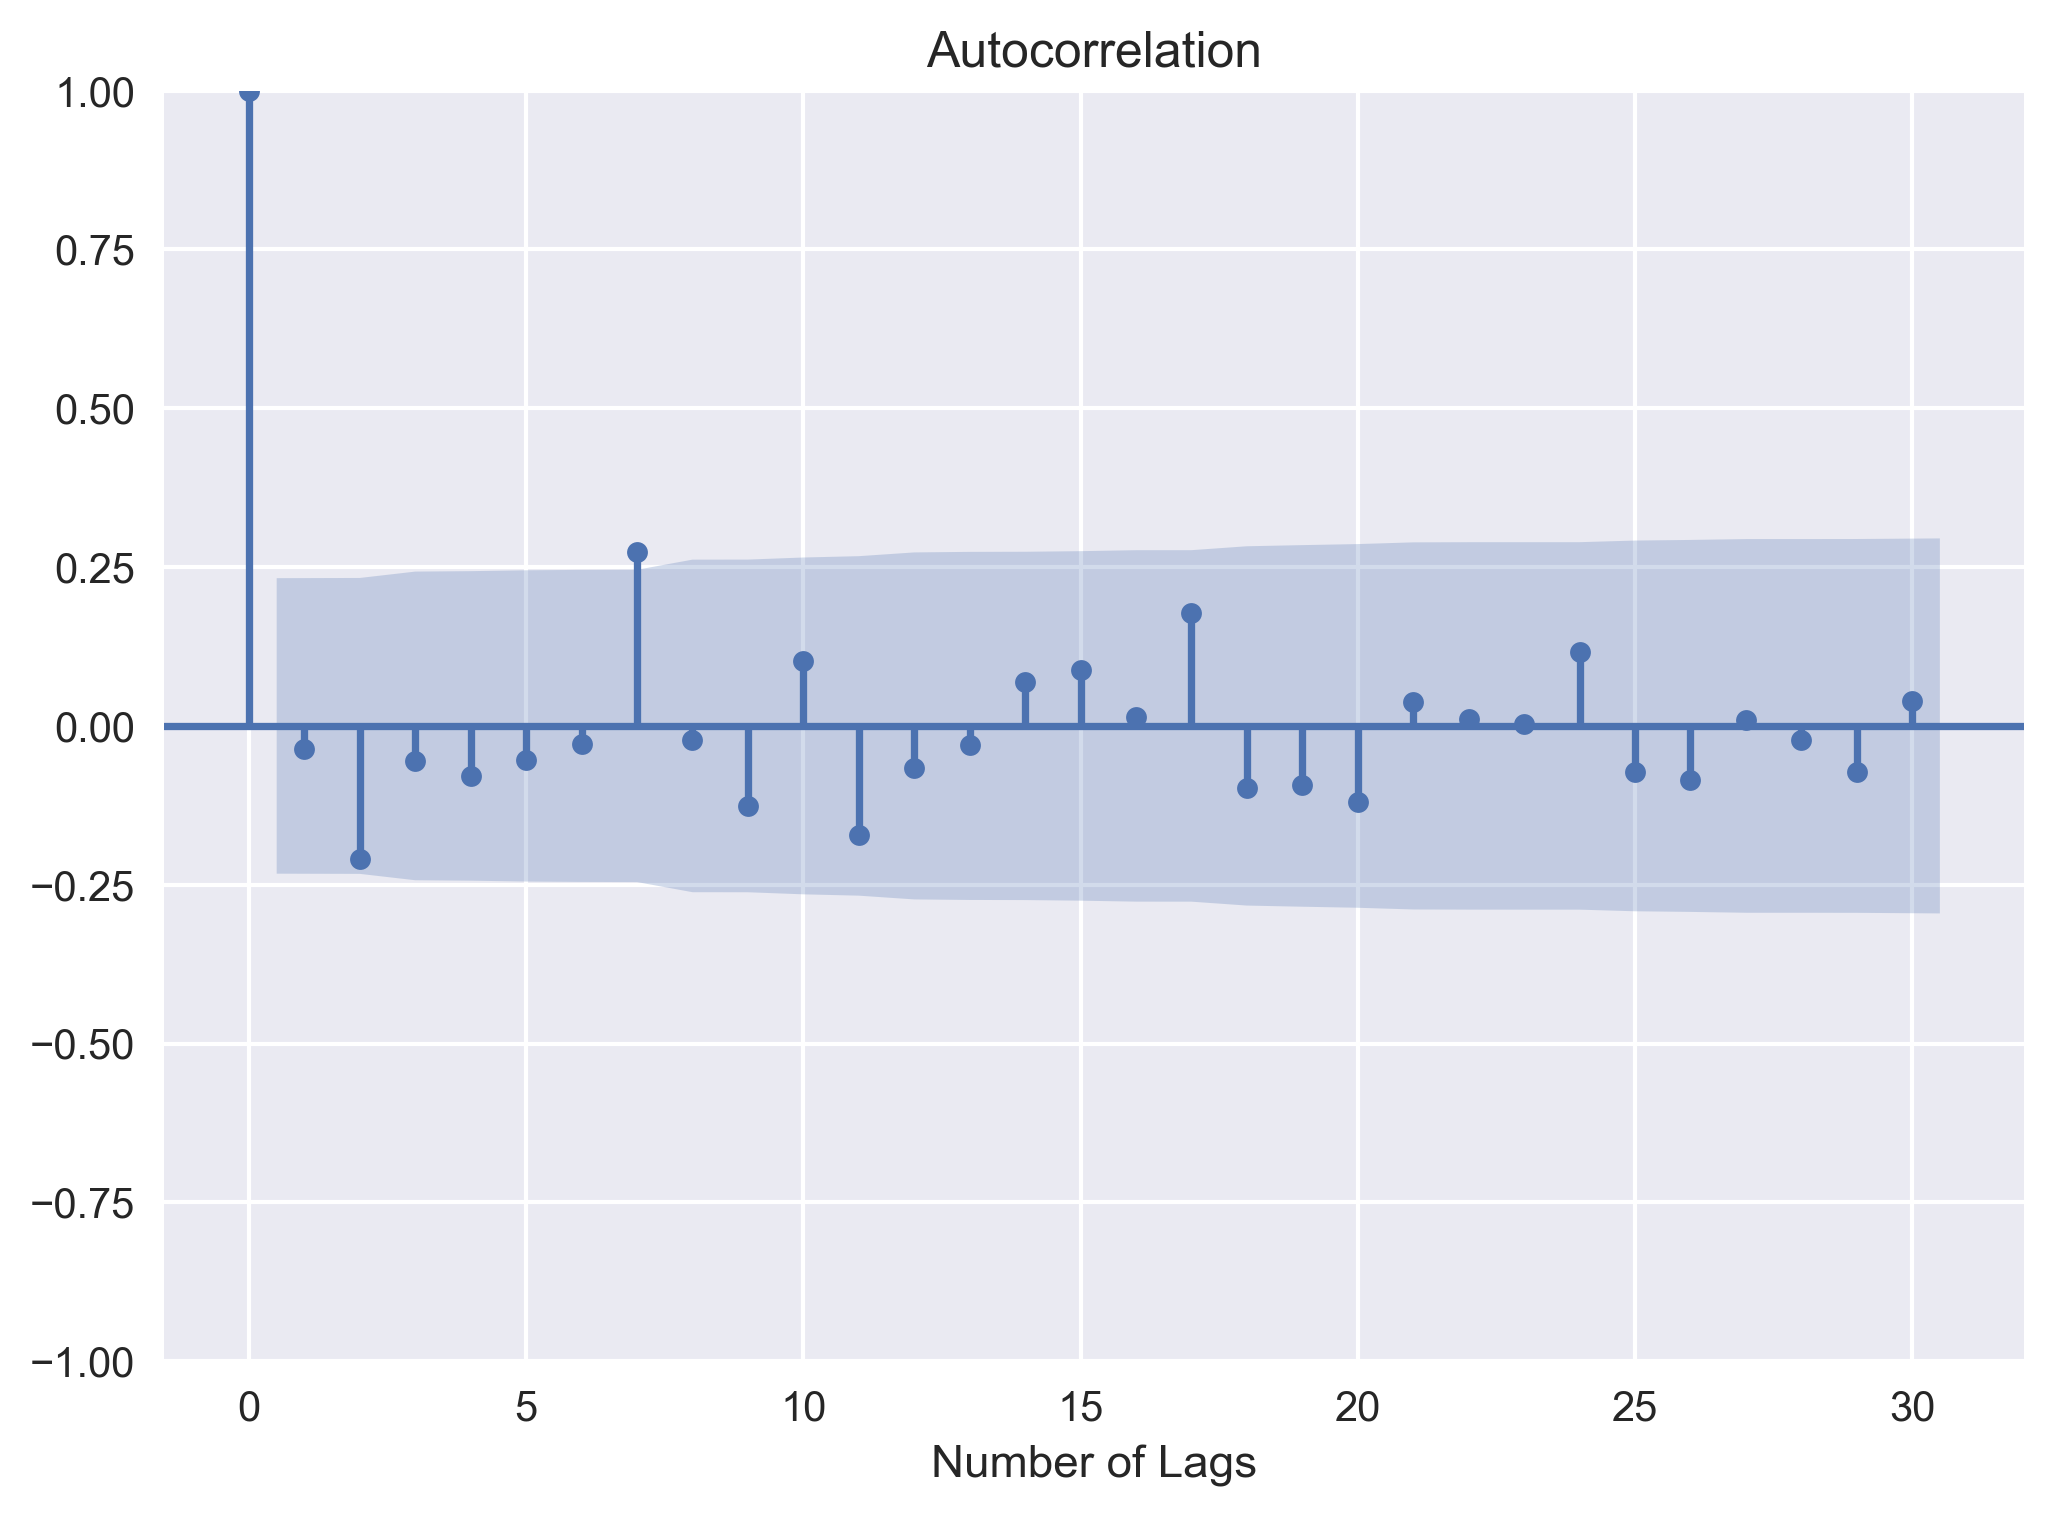

In [18]:
sm.graphics.tsa.plot_acf(diff_SP_price.dropna(),lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [19]:
stat_test2 = adfuller(diff_SP_price.dropna())[0:2]
print("The test statistic and p-value of ADF test after differencing are {}"\
      .format(stat_test2))

The test statistic and p-value of ADF test after differencing are (-7.0951058730170855, 4.3095548146405375e-10)


In [20]:
seasonal_index = energy.resample('Q').mean()

In [21]:
dates = energy.index.year.unique()
deseasonalized = []
for i in dates:
    for j in range(1, 13):
        deseasonalized.append((energy[str(i)][energy[str(i)]\
                                              .index.month==j]))
concat_deseasonalized = np.concatenate(deseasonalized)

In [22]:
deseason_energy = []
for i,s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i:i+3] / 
                           seasonal_index.iloc[s])
concat_deseason_energy = np.concatenate(deseason_energy)
deseason_energy = pd.DataFrame(concat_deseason_energy, 
                               index=energy.index)
deseason_energy.columns = ['Deaseasonalized Energy']
deseason_energy.head()

Deaseasonalized Energy
2010-01-01                1.002071
2010-02-01                1.016424
2010-03-01                0.981505
2010-04-01                0.966964
2010-05-01                1.006888

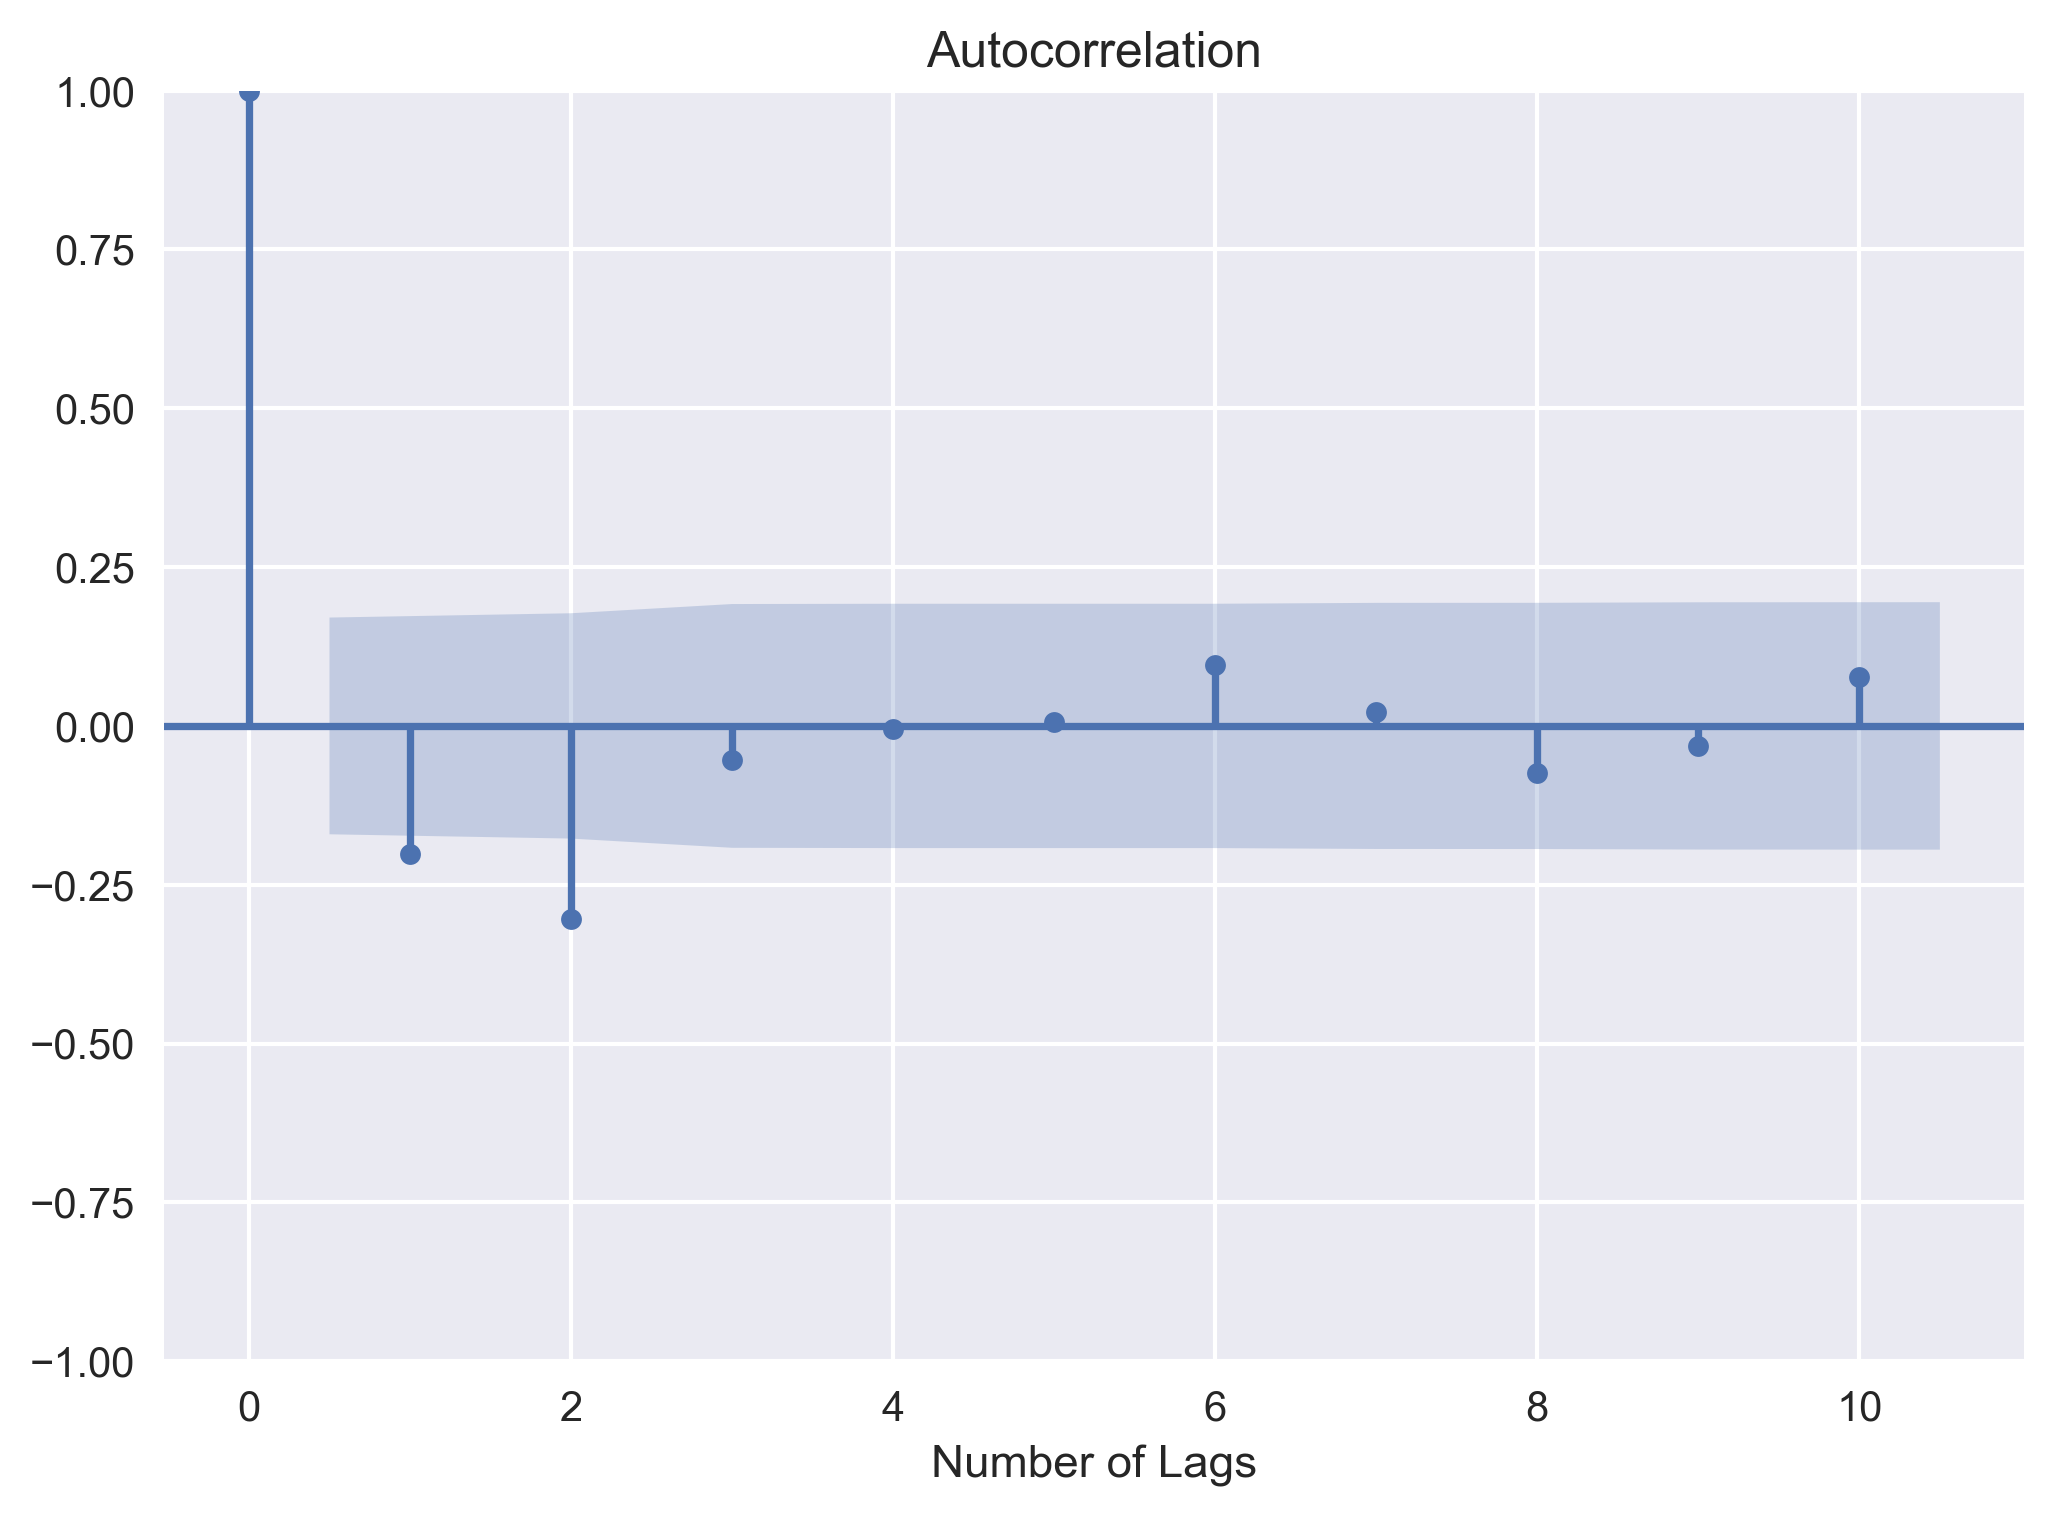

In [24]:
sm.graphics.tsa.plot_acf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

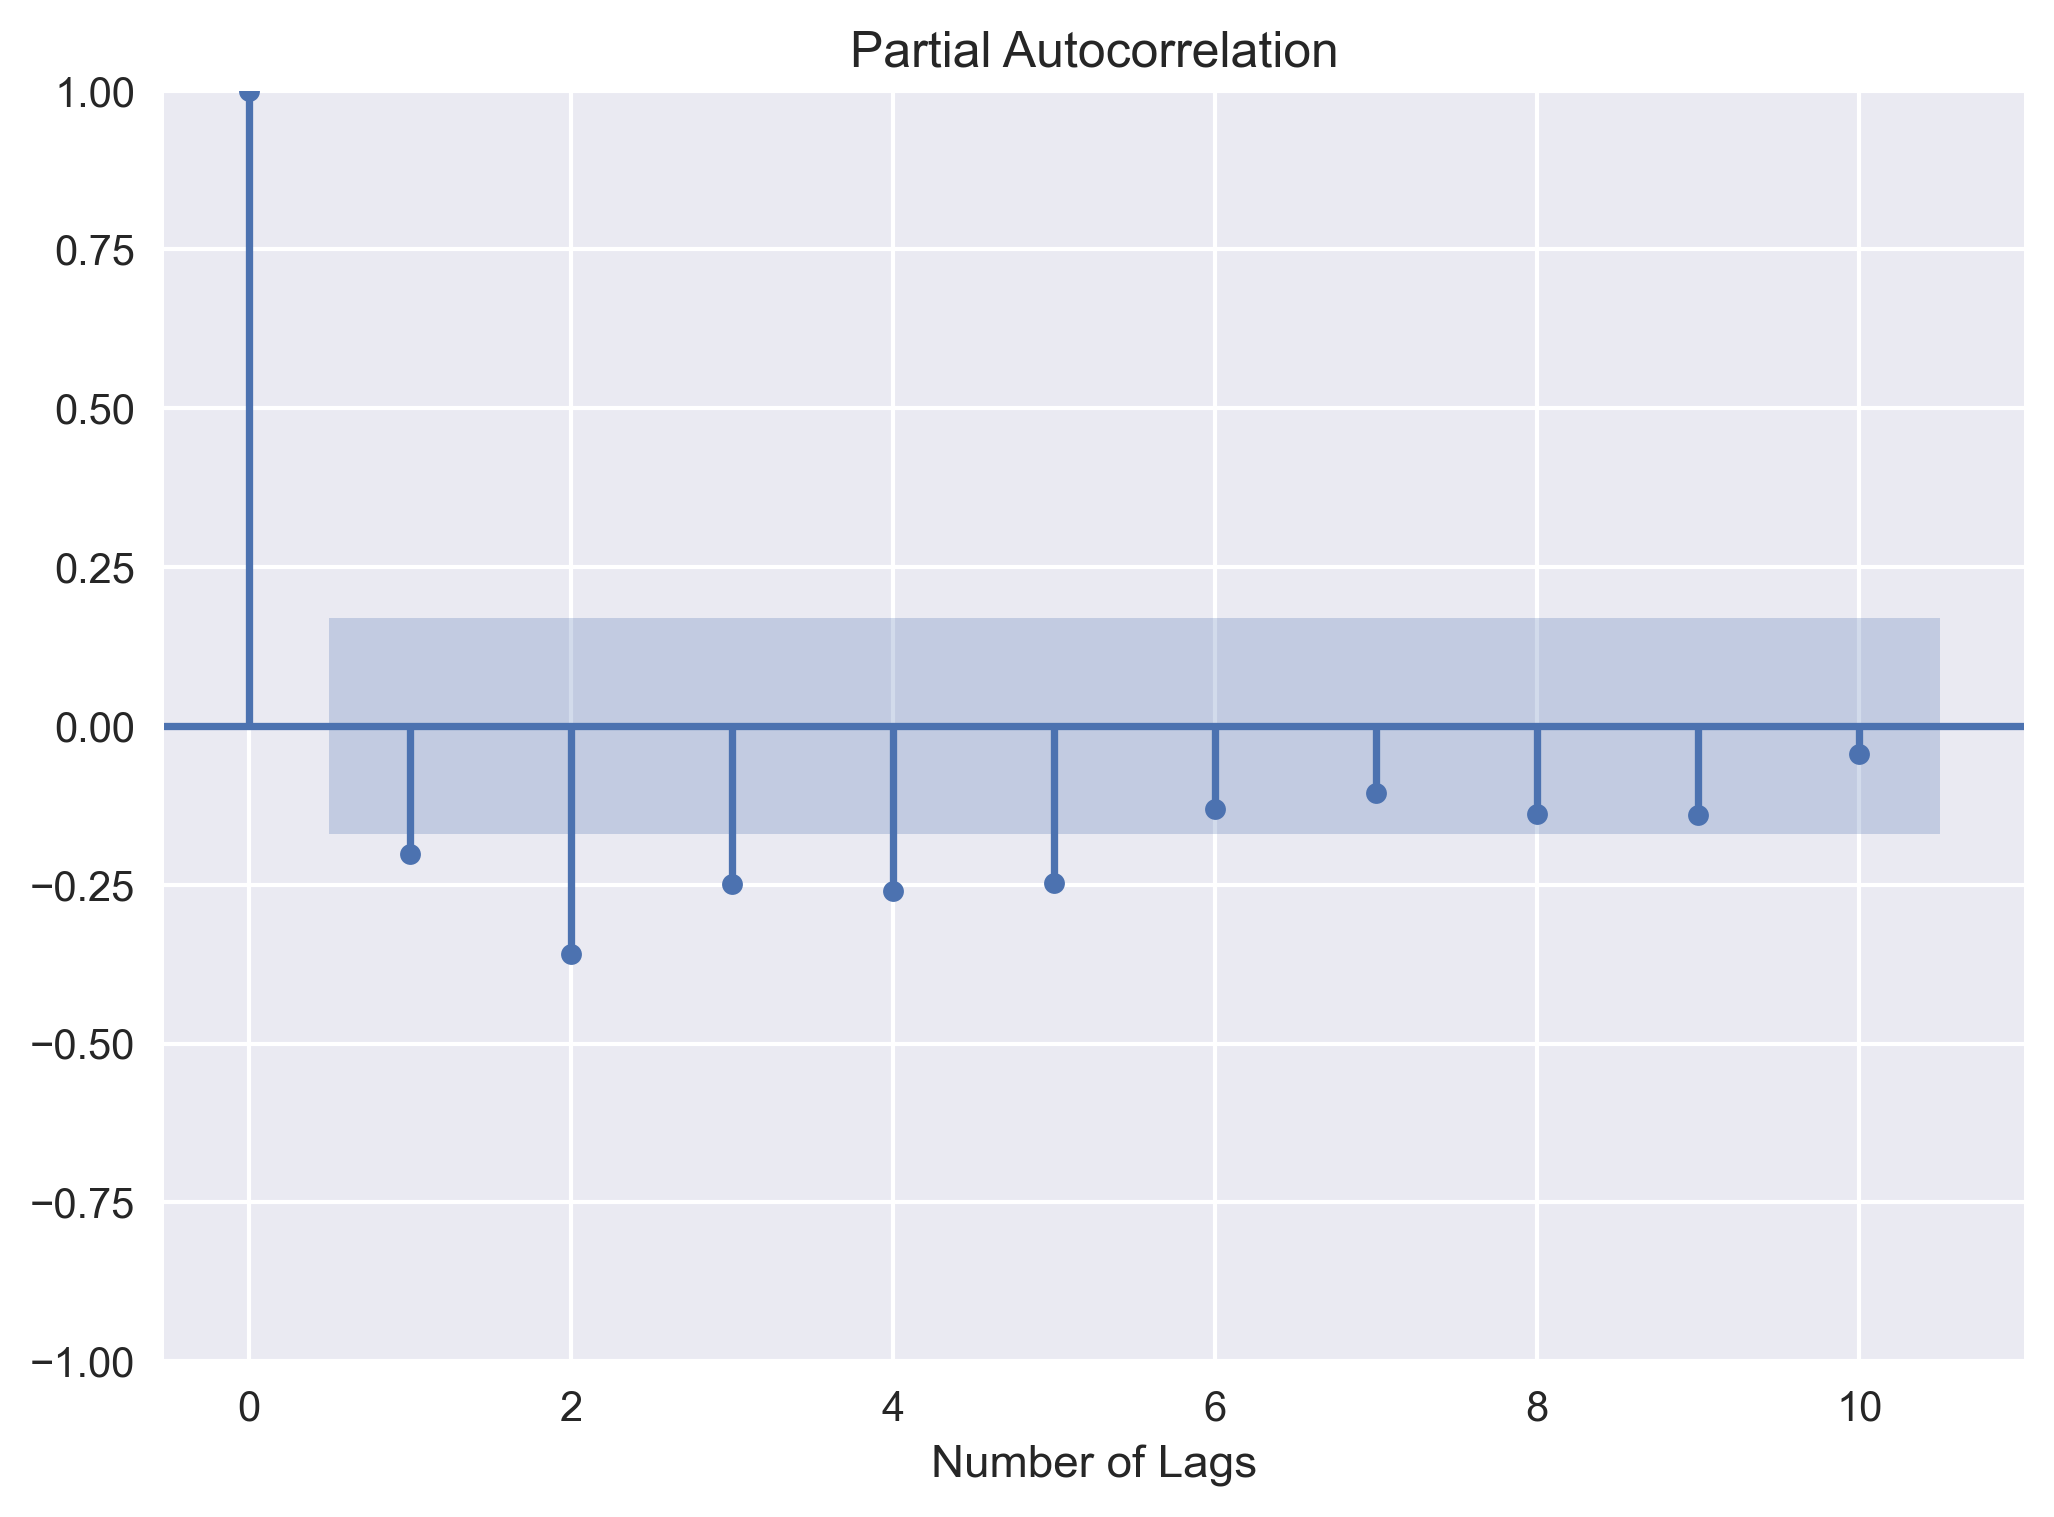

In [25]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

## White Noise

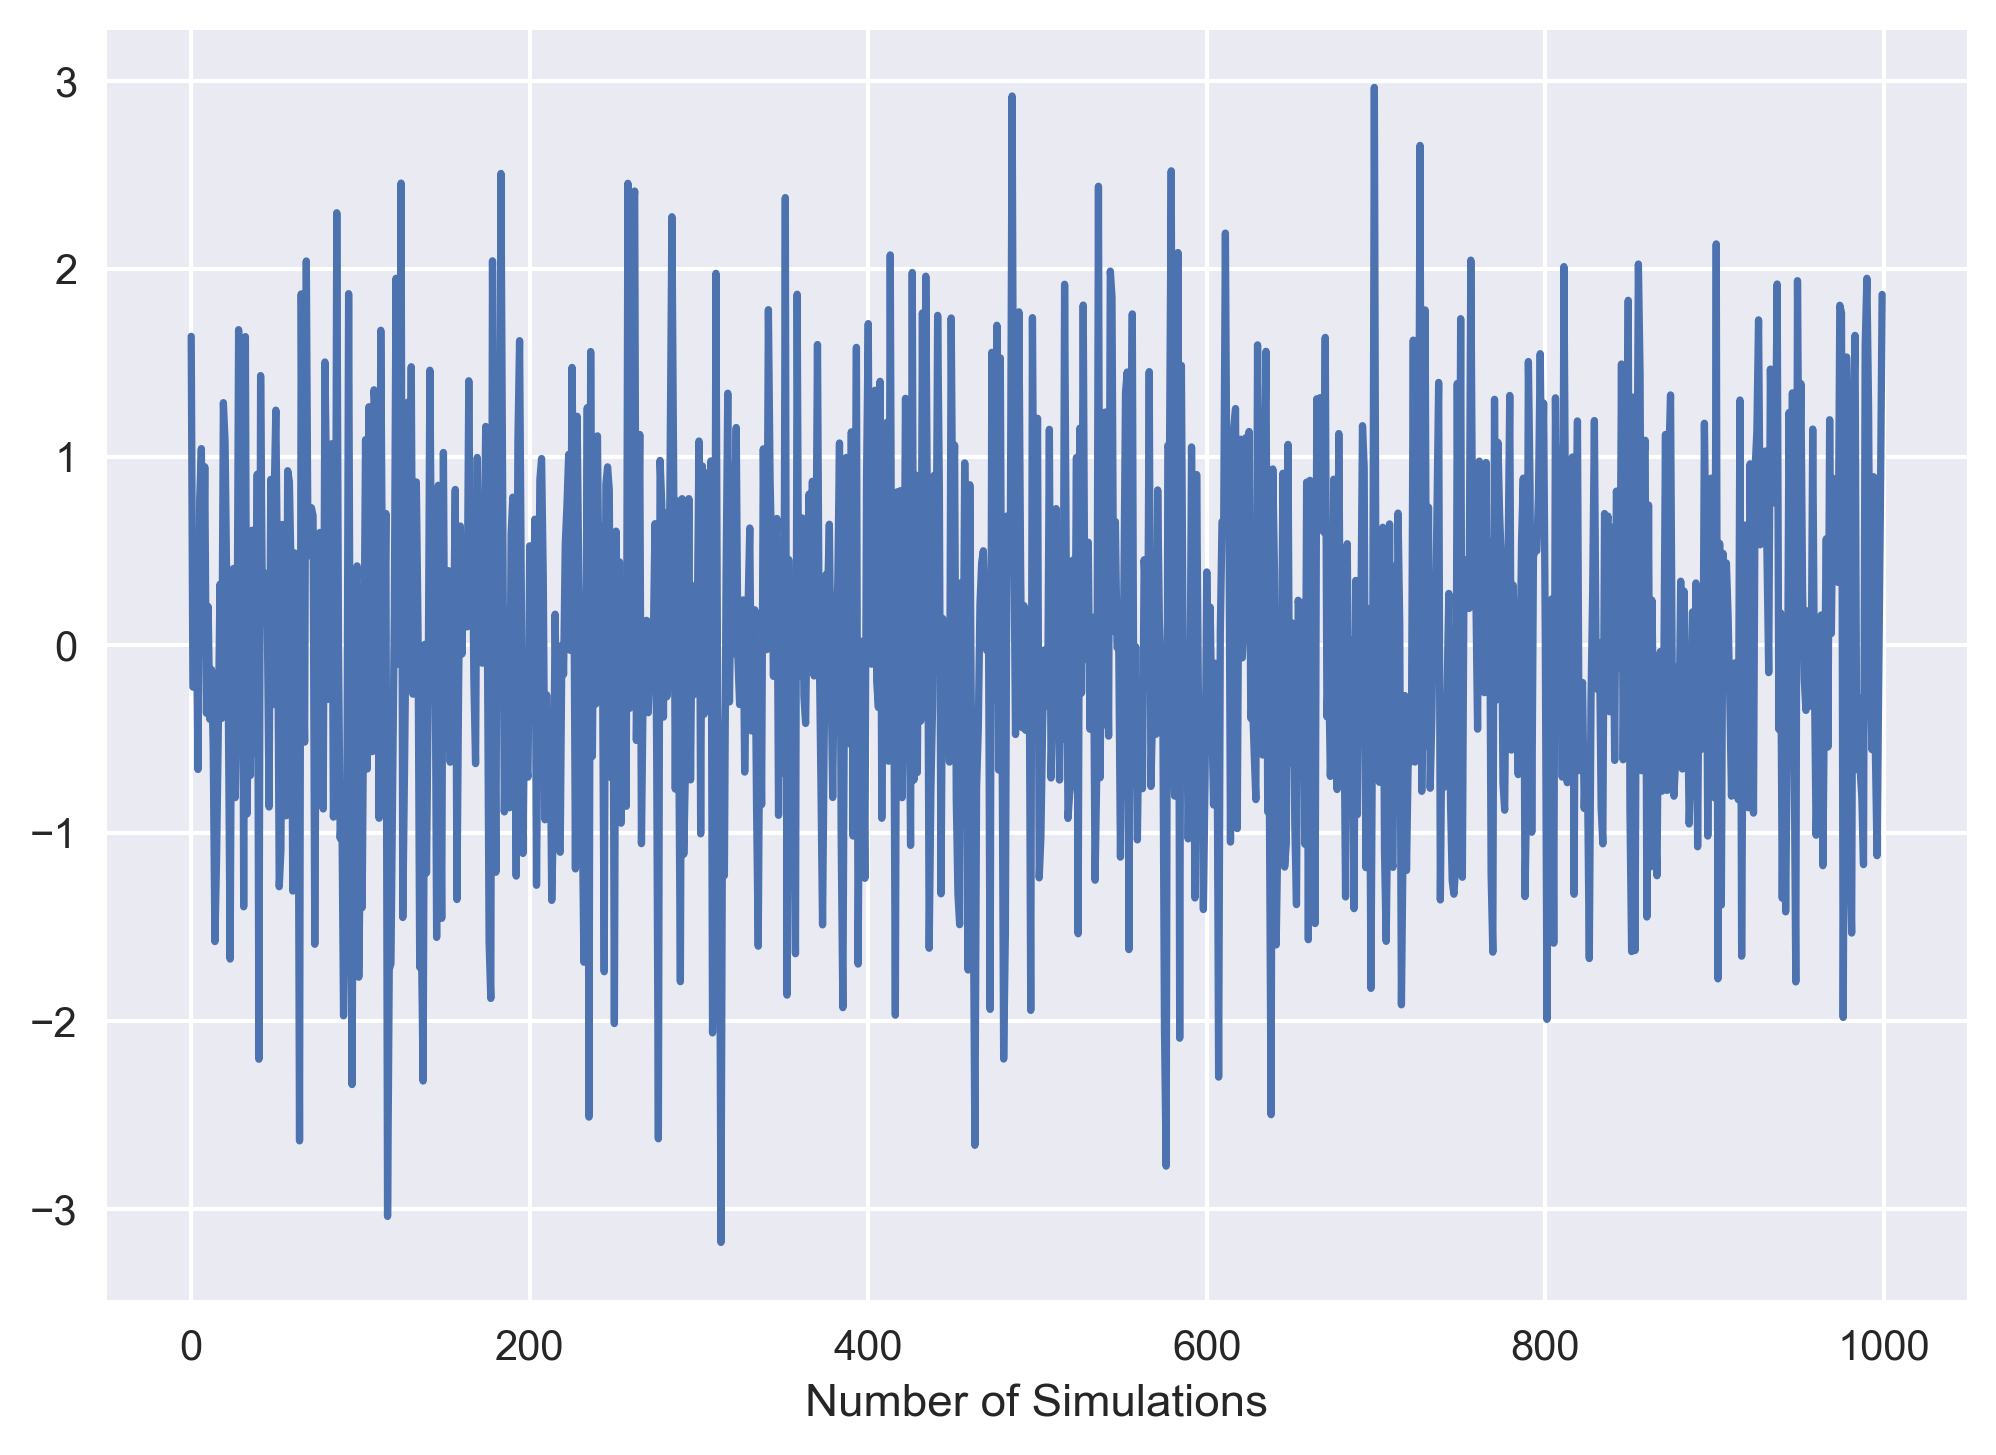

In [26]:
mu = 0
std = 1 
WN = np.random.normal(mu, std, 1000)

plt.plot(WN)
plt.xlabel('Number of Simulations')
plt.show()

## Moving Average

In [27]:
ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock_prices = yf.download(ticker, start, end, interval='1d')\
               .Close

[*********************100%***********************]  2 of 2 completed


In [28]:
stock_prices = stock_prices.dropna()

In [29]:
for i in ticker:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("The ADF test statistic and p-value of {} are {}"\
          .format(i, stat_test))

The ADF test statistic and p-value of AAPL are (0.30197458557904727, 0.977434898025437)
The ADF test statistic and p-value of MSFT are (-0.7838047612900129, 0.8238330701563921)


In [30]:
diff_stock_prices = stock_prices.diff().dropna()

In [31]:
split = int(len(diff_stock_prices['AAPL'].values) * 0.95)
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

In [32]:
diff_train_aapl.to_csv('diff_train_aapl.csv')
diff_test_aapl.to_csv('diff_test_aapl.csv')
diff_train_msft.to_csv('diff_train_msft.csv')
diff_test_msft.to_csv('diff_test_msft.csv')

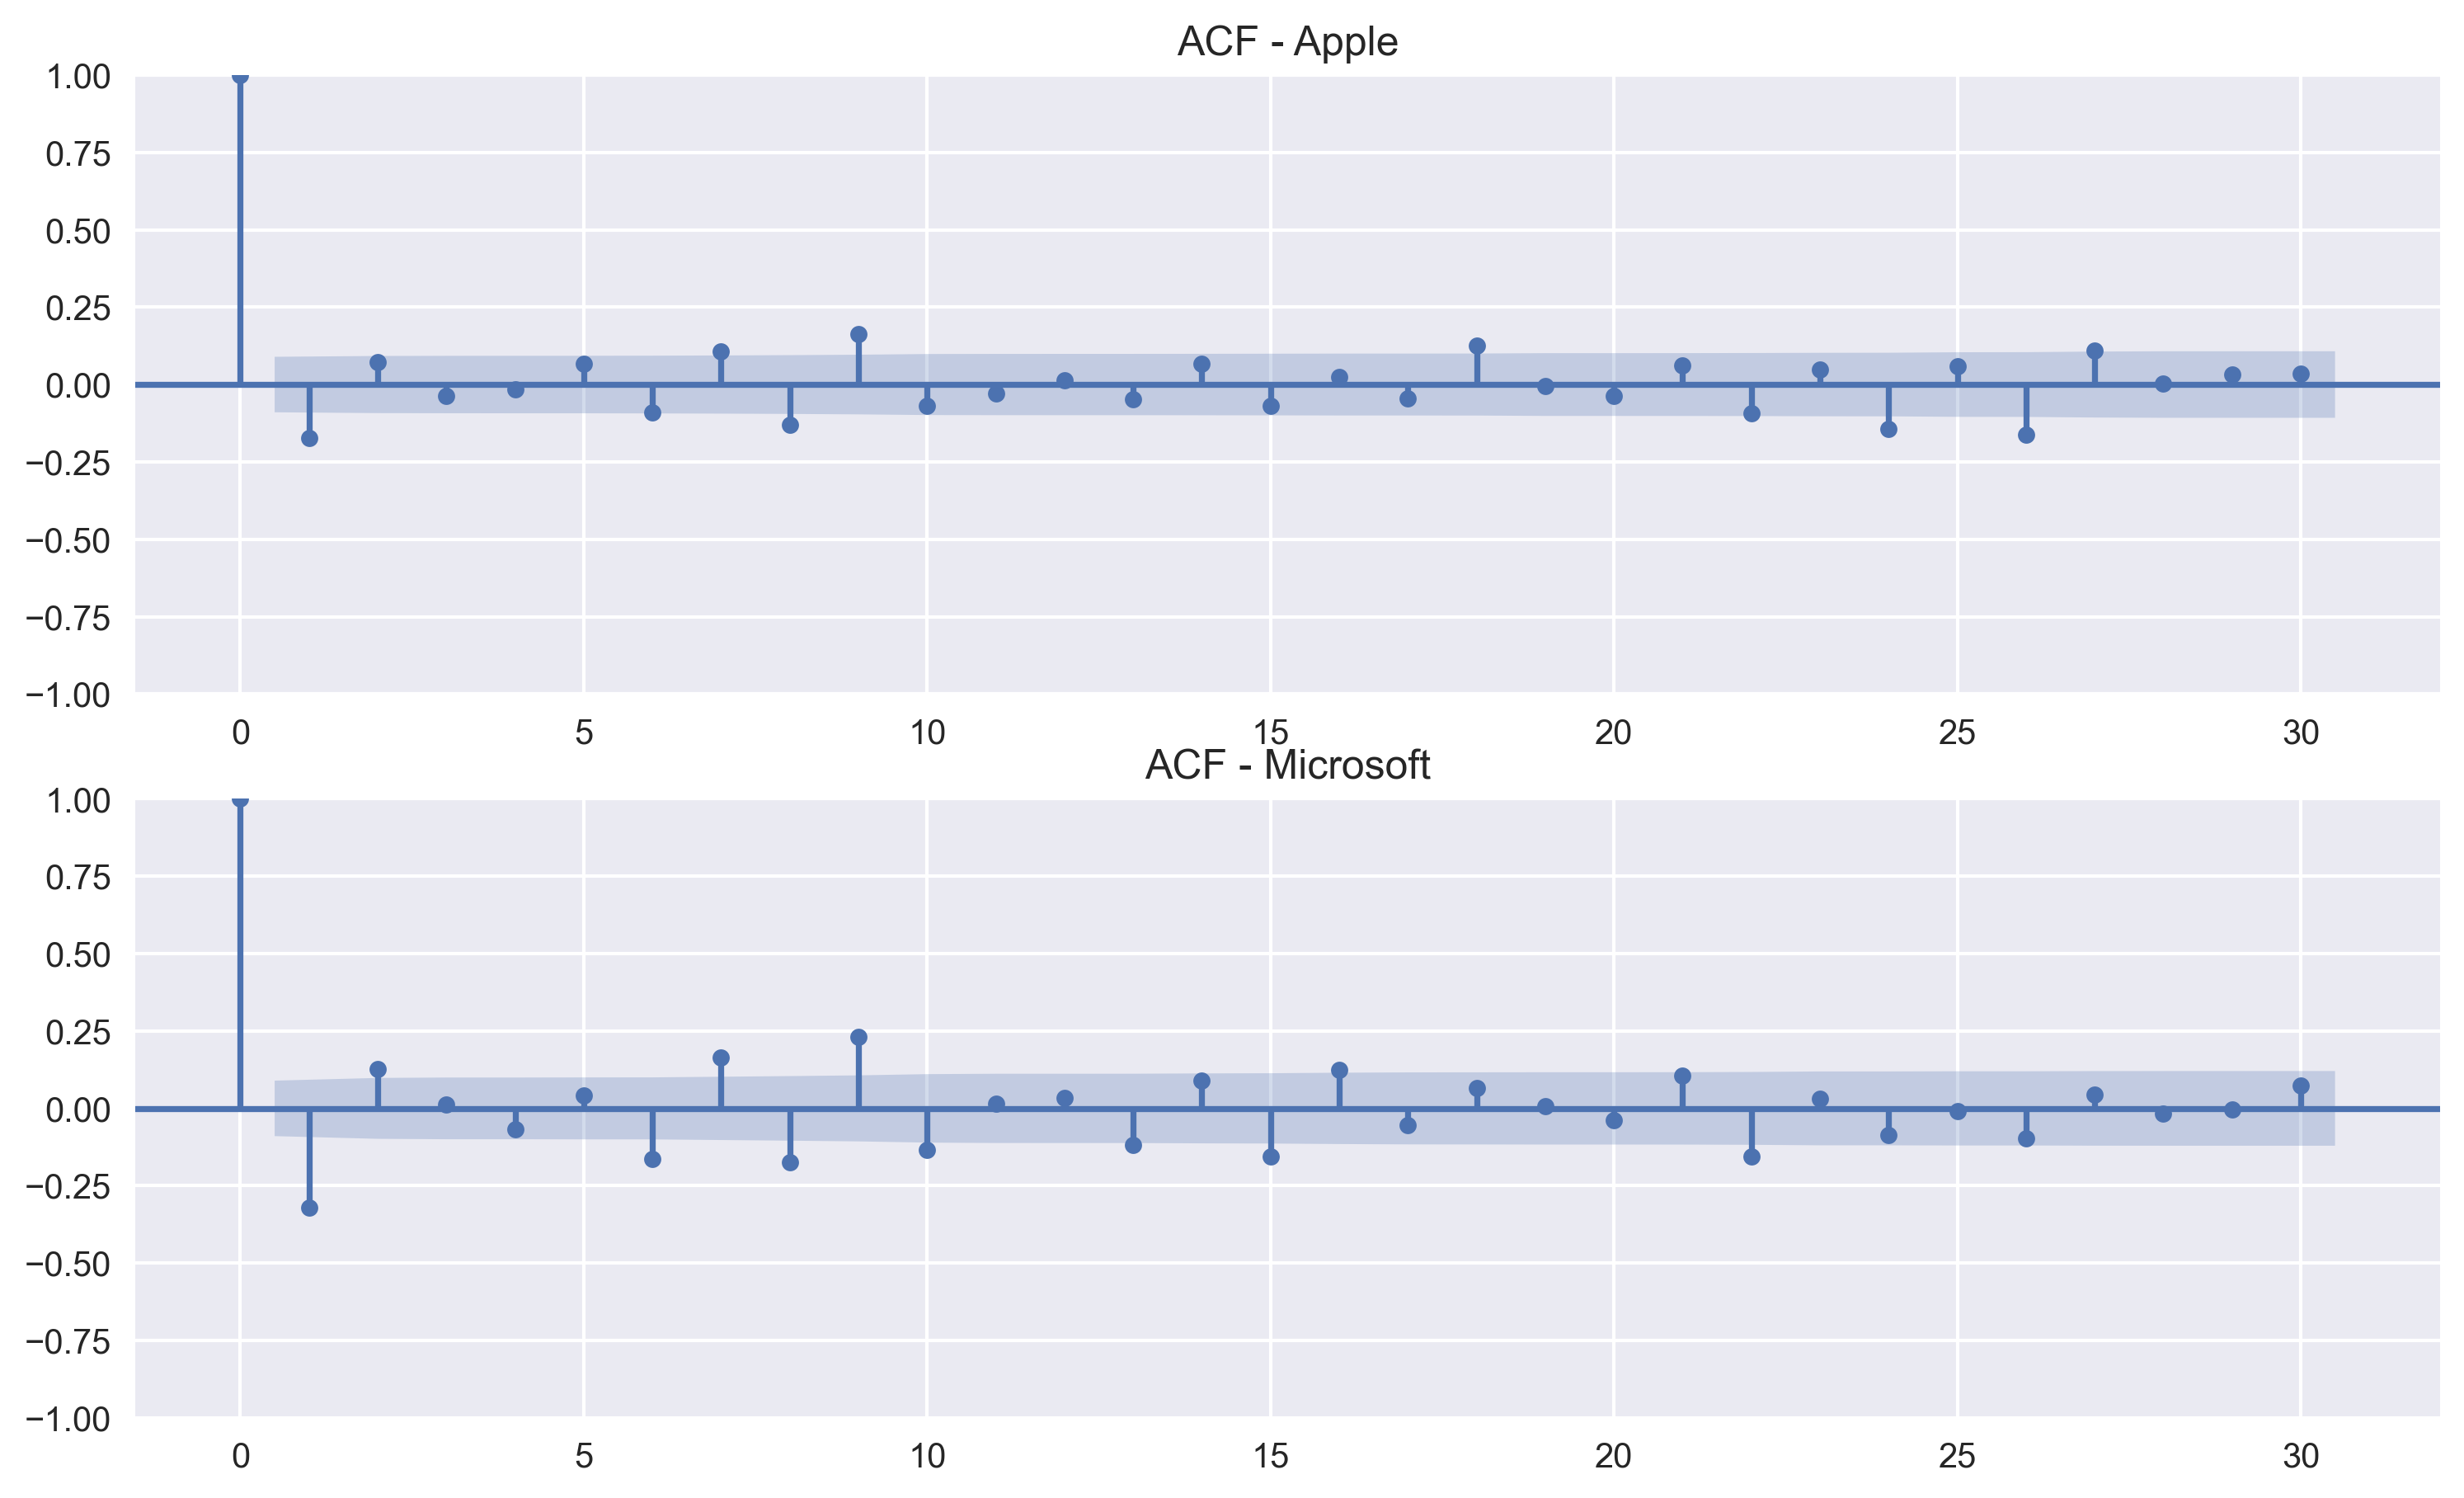

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout() 
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30,
                         ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft,lags=30,
                         ax=ax[1], title='ACF - Microsoft')
plt.show()

In [34]:
short_moving_average_appl = diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl = diff_train_aapl.rolling(window=22).mean()

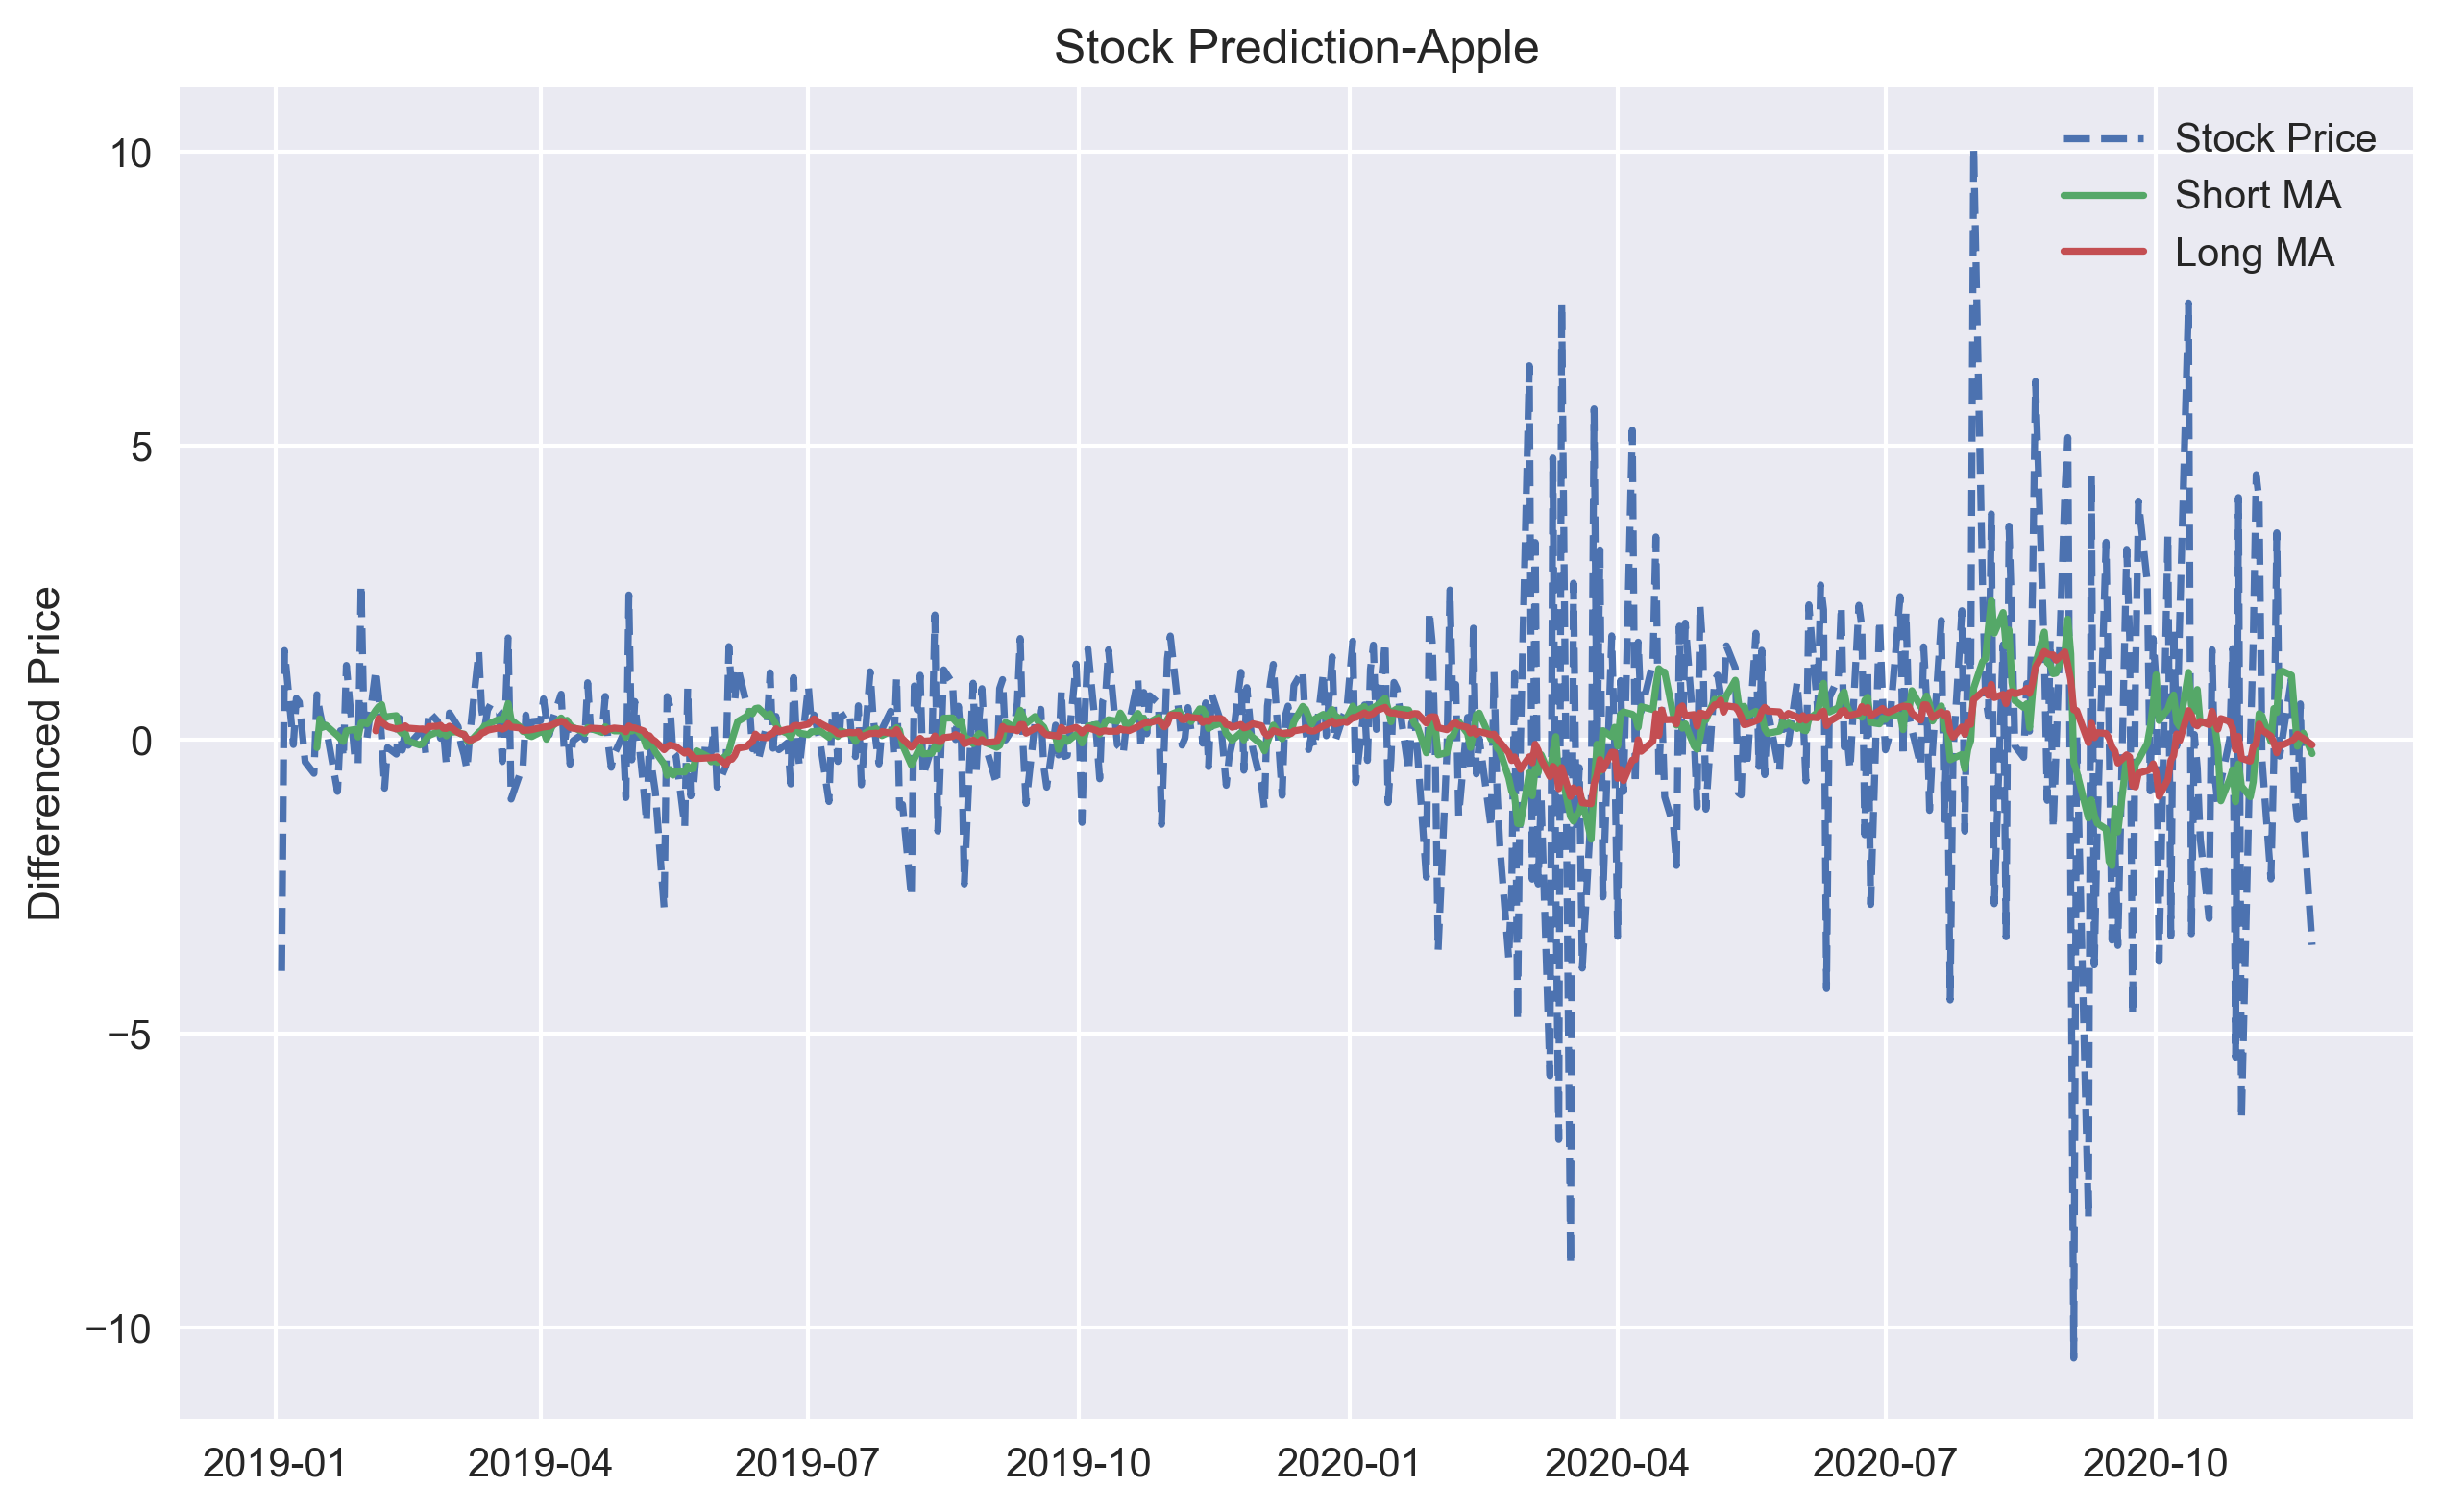

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_aapl.loc[start:end].index, 
        diff_train_aapl.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_appl.loc[start:end].index, 
        short_moving_average_appl.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_appl.loc[start:end].index, 
        long_moving_average_appl.loc[start:end],
        label = 'Long MA', linestyle='solid')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_title('Stock Prediction-Apple')
plt.show()

In [36]:
short_moving_average_msft = diff_train_msft.rolling(window=2).mean()
long_moving_average_msft = diff_train_msft.rolling(window=22).mean()

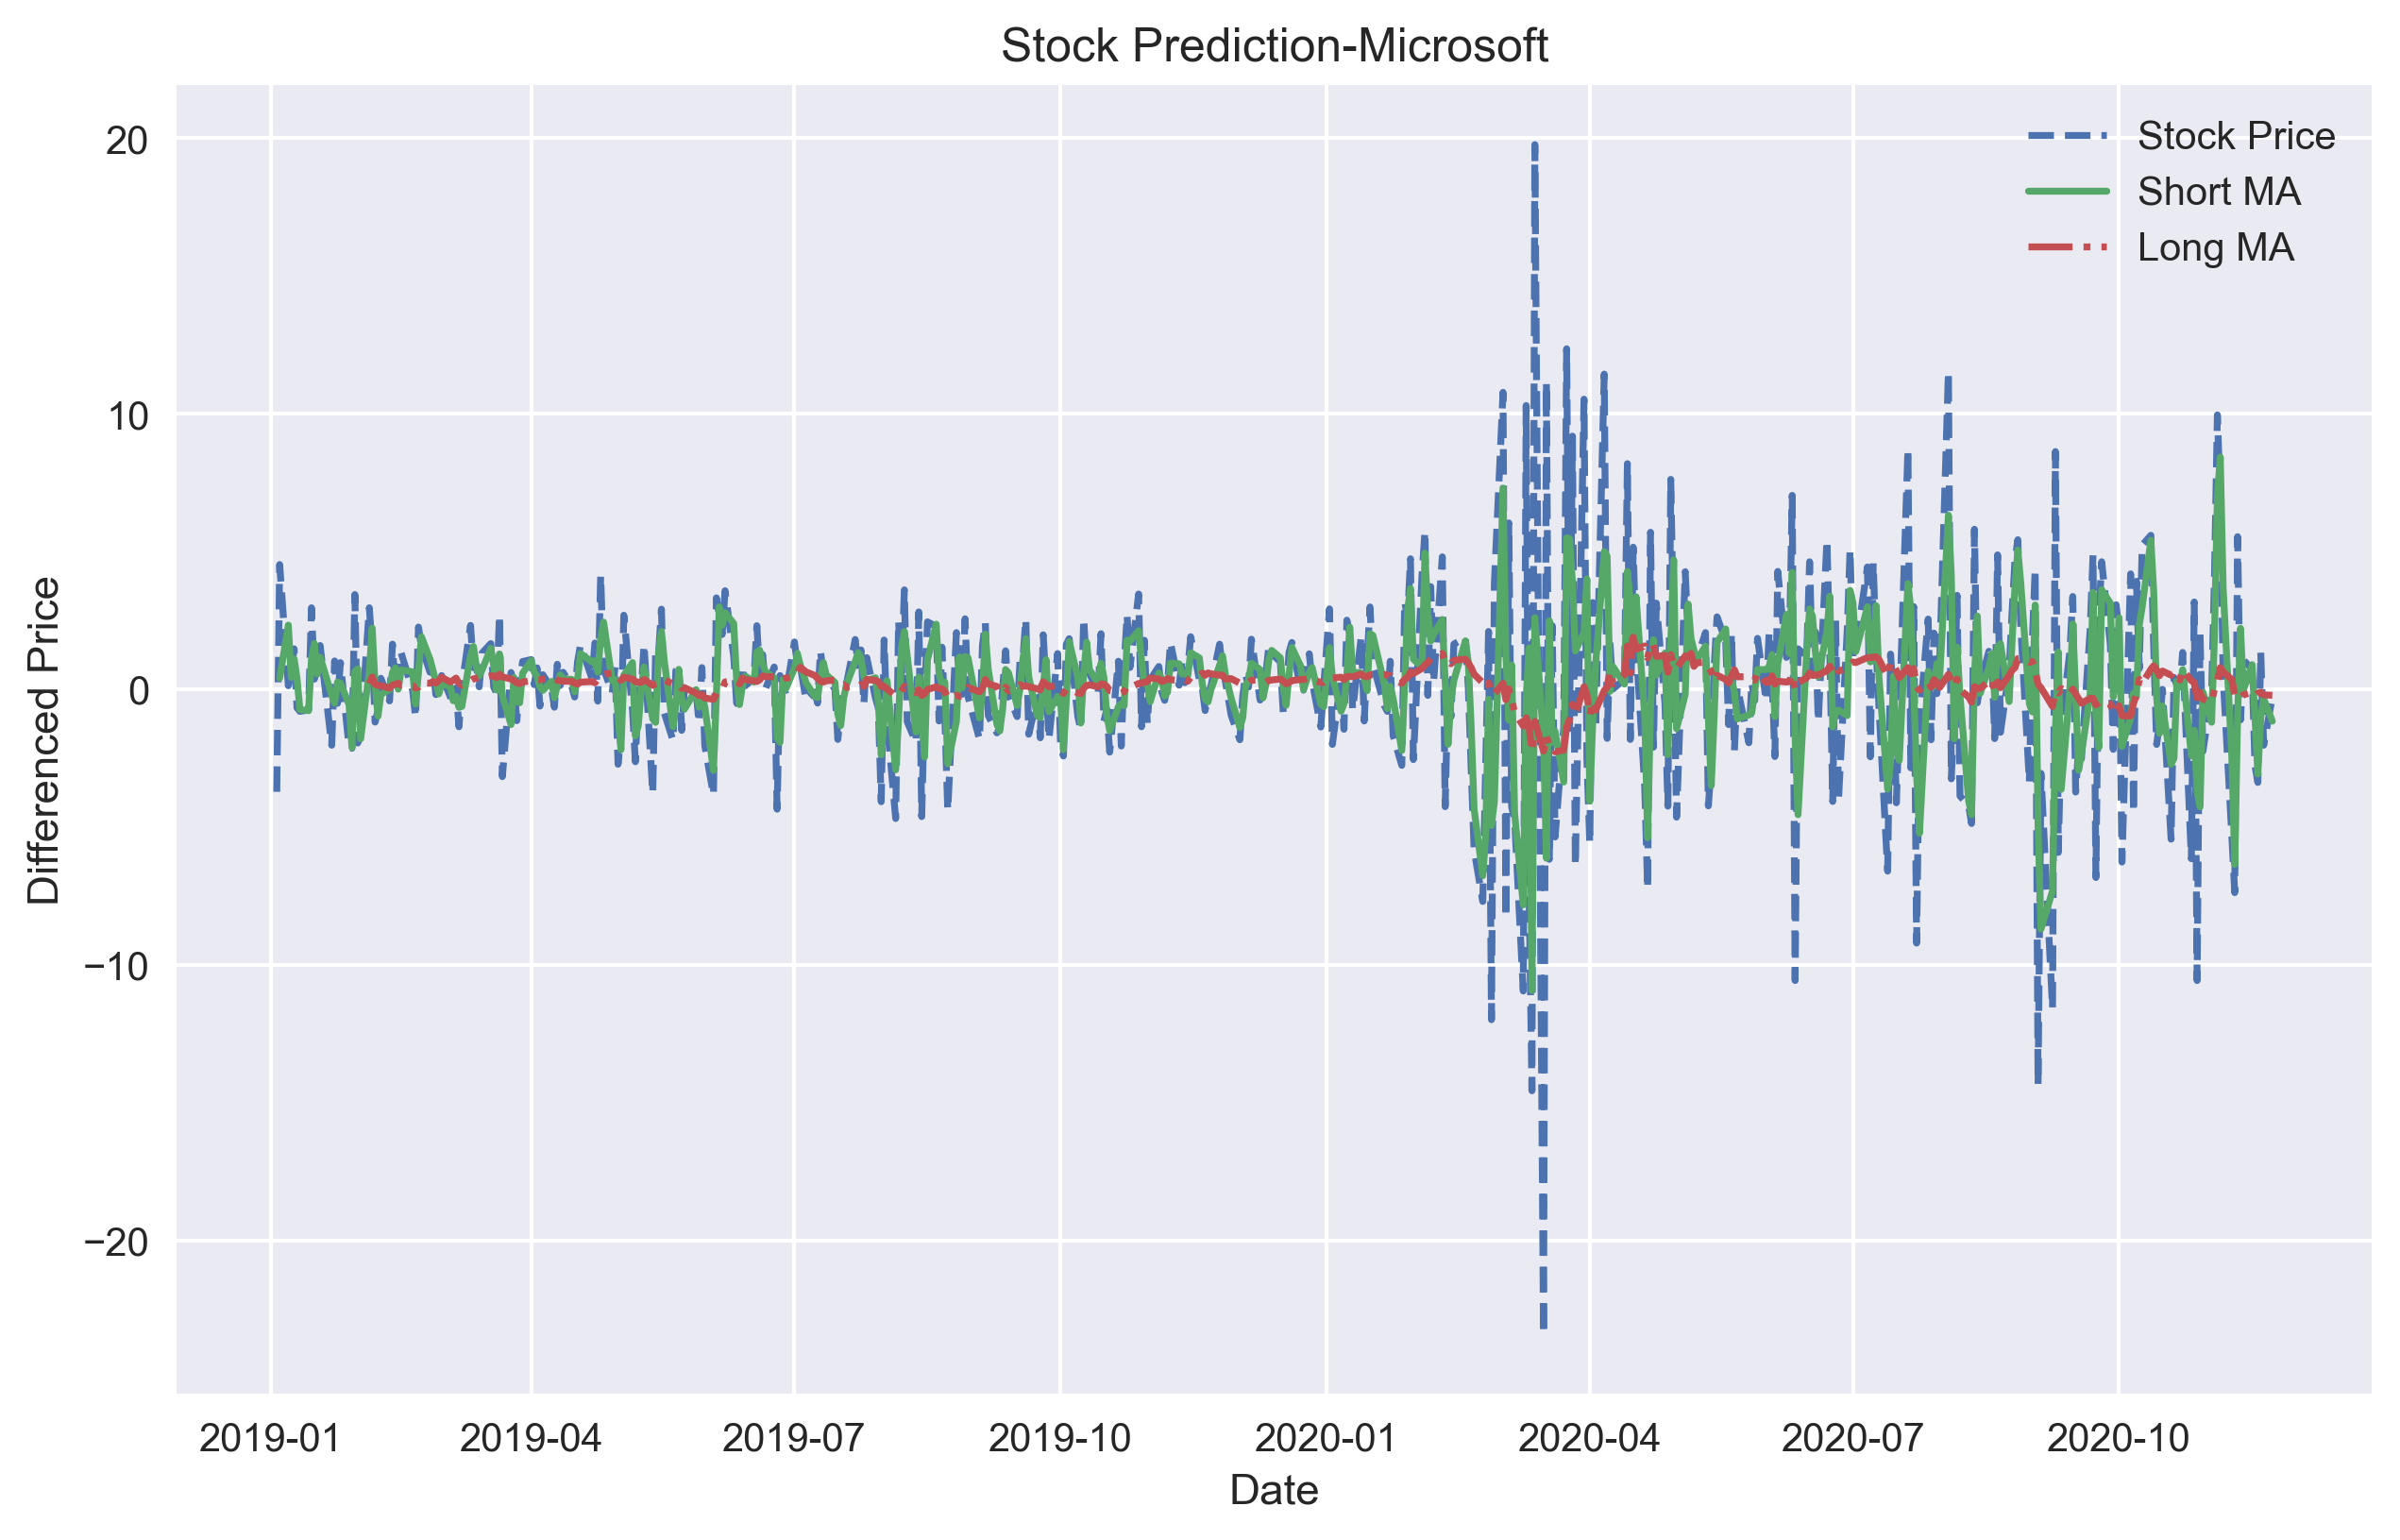

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_msft.loc[start:end].index,
        diff_train_msft.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_msft.loc[start:end].index,
        short_moving_average_msft.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_msft.loc[start:end].index,
        long_moving_average_msft.loc[start:end],
        label = 'Long MA', linestyle='-.')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_xlabel('Date')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

## Autoregressive Model

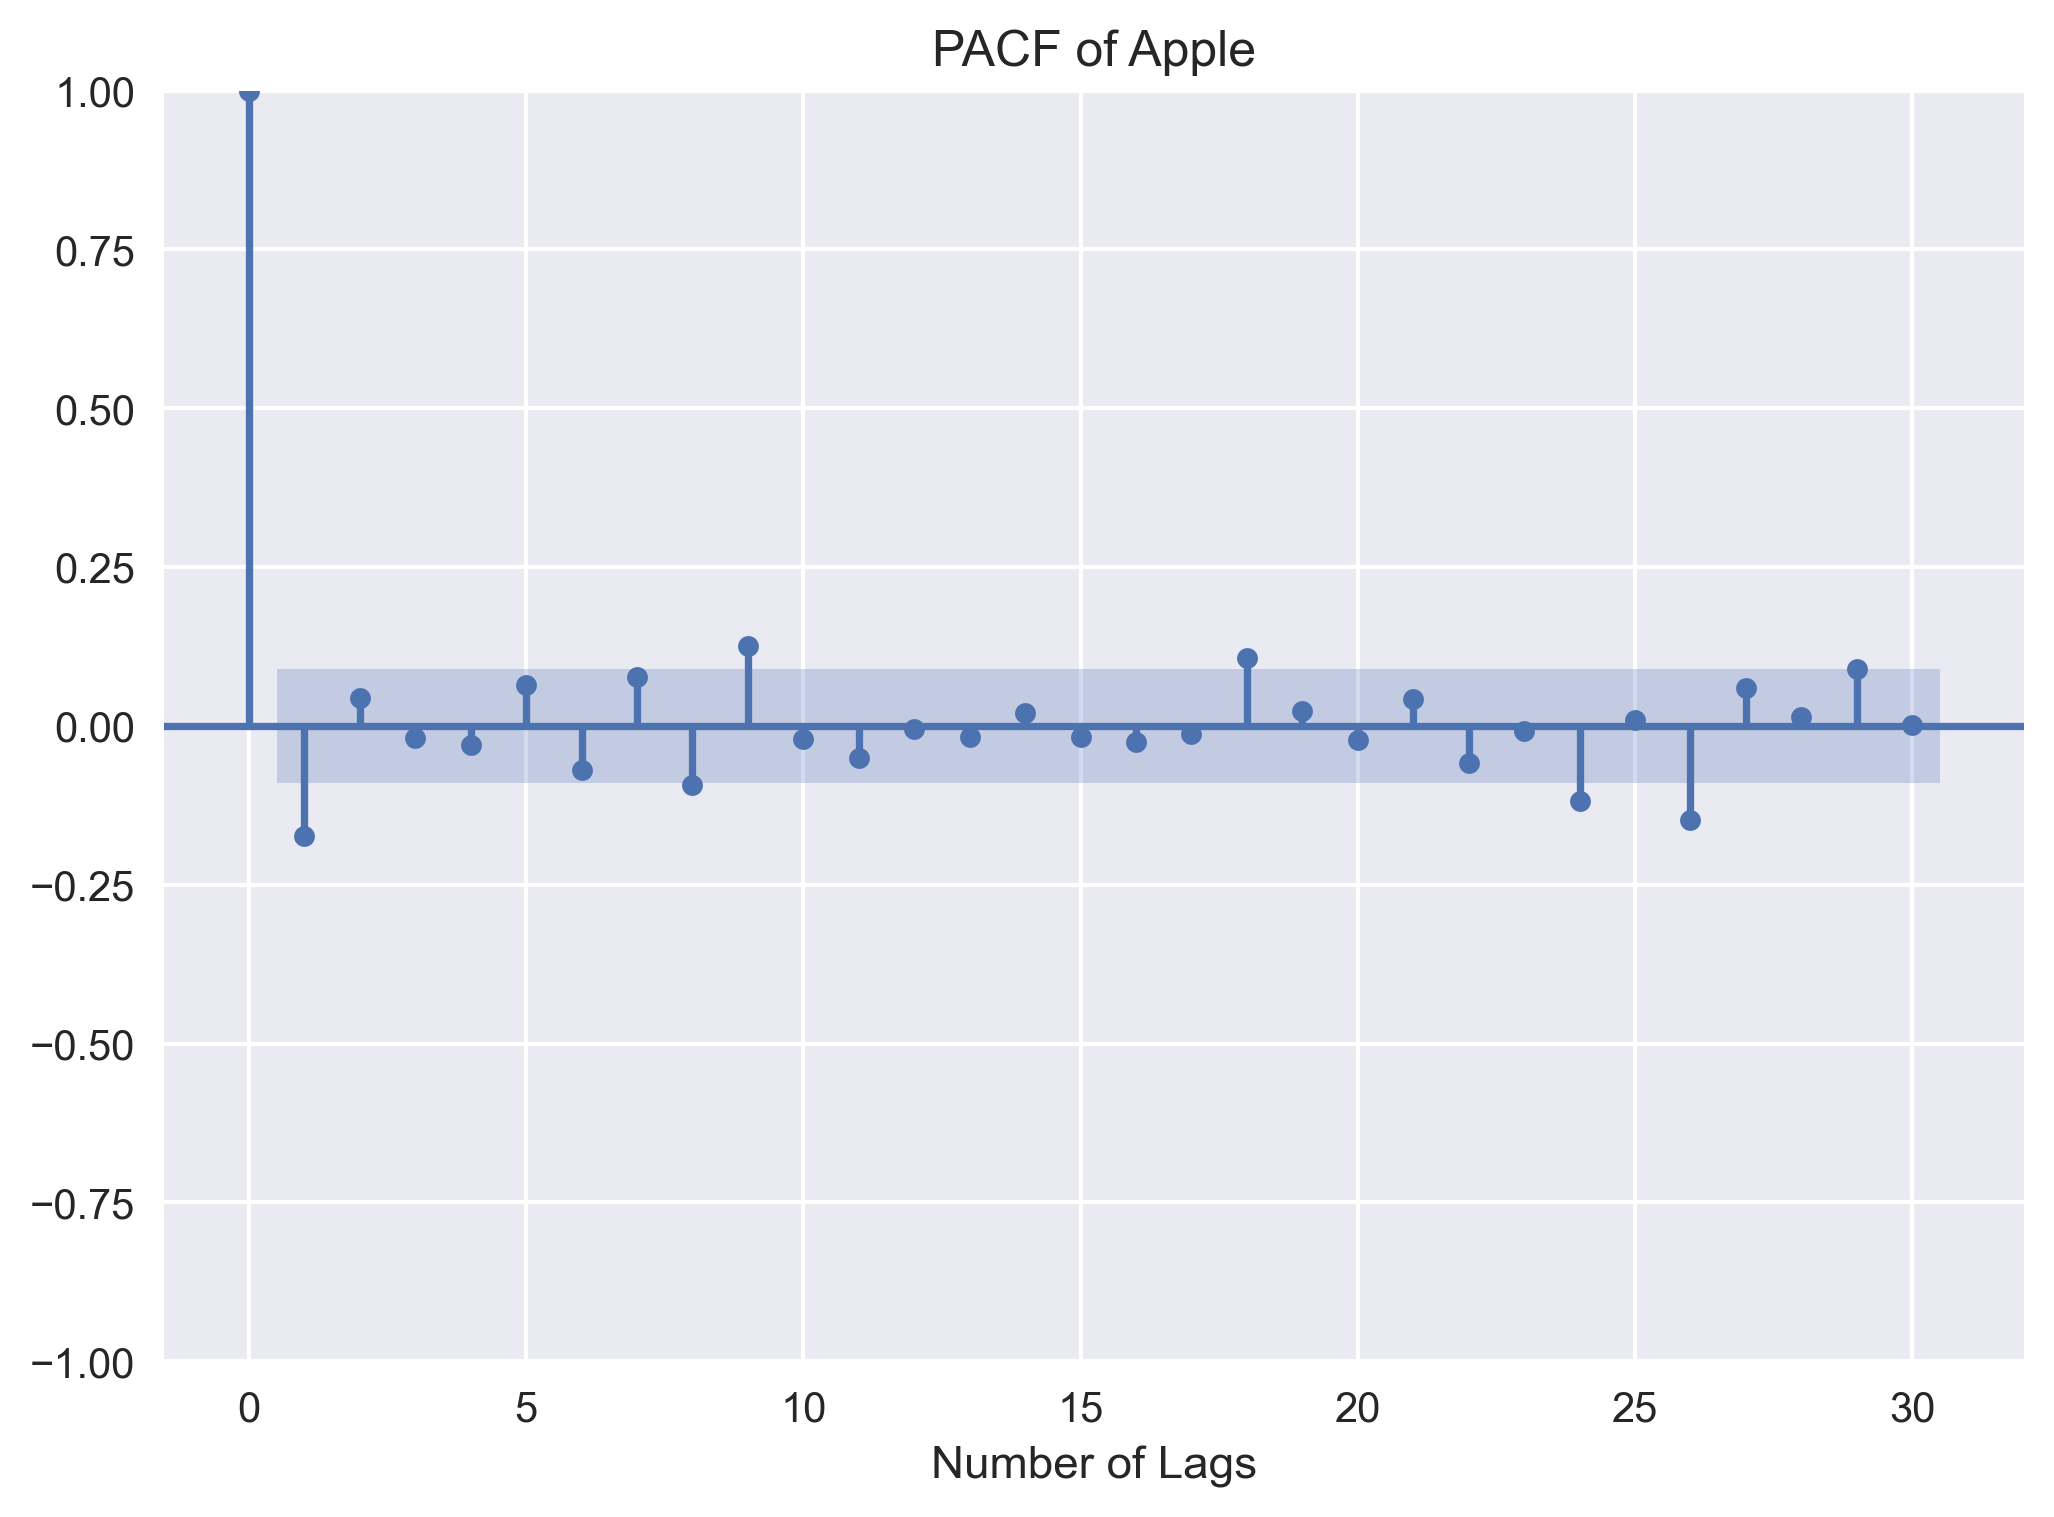

In [38]:
sm.graphics.tsa.plot_pacf(diff_train_aapl, lags=30)
plt.title('PACF of Apple')
plt.xlabel('Number of Lags')
plt.show()

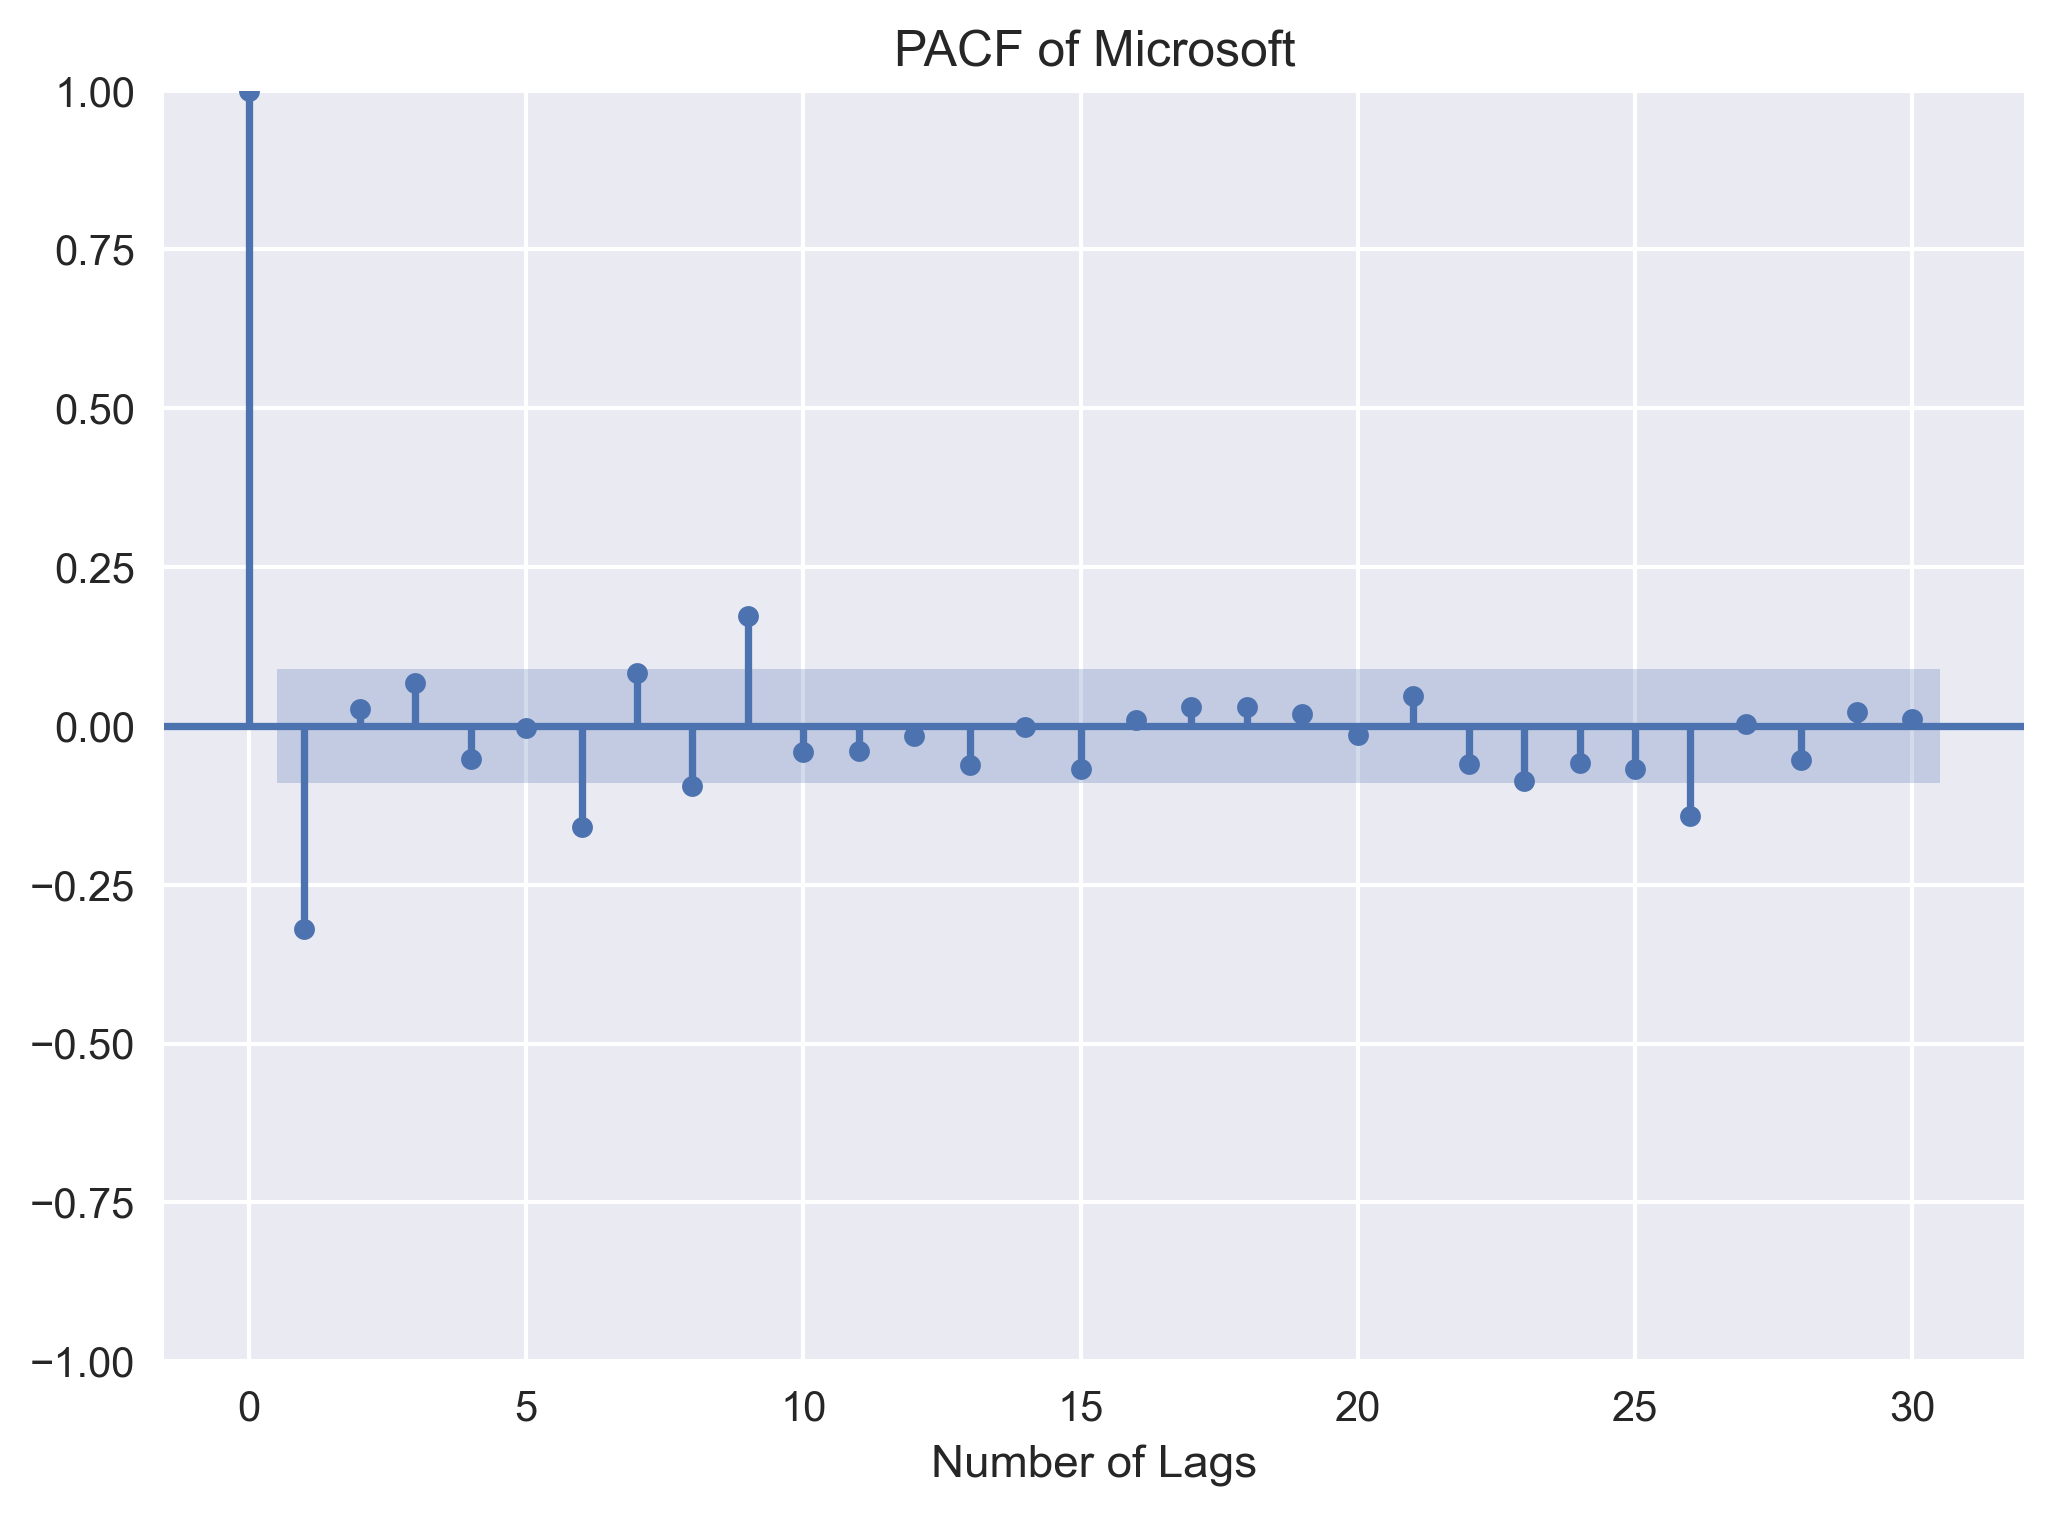

In [39]:
sm.graphics.tsa.plot_pacf(diff_train_msft, lags=30)
plt.title('PACF of Microsoft')
plt.xlabel('Number of Lags')
plt.show()

In [40]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [41]:
ar_aapl = AutoReg(diff_train_aapl.values, lags=29)
ar_fitted_aapl = ar_aapl.fit()

In [42]:
ar_predictions_aapl = ar_fitted_aapl.predict(start=len(diff_train_aapl), 
                                             end=len(diff_train_aapl)\
                                             + len(diff_test_aapl) - 1, 
                                             dynamic=False)

In [43]:
for i in range(len(ar_predictions_aapl)):
    print('==' * 25)
    print('predicted values:{:.4f} & actual values:{:.4f}'\
          .format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:1.6538 & actual values:1.3200
predicted values:-0.8347 & actual values:0.8600
predicted values:-0.9992 & actual values:0.5600
predicted values:1.1373 & actual values:2.4600
predicted values:-0.1101 & actual values:3.6700
predicted values:1.7878 & actual values:0.3600
predicted values:-0.9174 & actual values:-0.1400
predicted values:1.7353 & actual values:-0.6900
predicted values:-1.5159 & actual values:1.5000
predicted values:1.8259 & actual values:0.6300
predicted values:-1.2438 & actual values:-2.6000
predicted values:-0.5361 & actual values:1.4600
predicted values:-0.1062 & actual values:-0.8300
predicted values:-0.6179 & actual values:-0.6300
predicted values:1.3191 & actual values:6.1000
predicted values:0.2425 & actual values:-0.0700
predicted values:0.4512 & actual values:0.8900
predicted values:-1.3076 & actual values:-2.0400
predicted values:0.5883 & actual values:1.5700
predicted values:0.2458 & actual values:3.6500
predicted values:0.0188 & actual values:-0.

In [44]:
ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index = diff_test_aapl.index

In [45]:
ar_msft = AutoReg(diff_train_msft.values, lags=26)
ar_fitted_msft = ar_msft.fit()

In [46]:
ar_predictions_msft = ar_fitted_msft.predict(start=len(diff_train_msft), 
                                             end=len(diff_train_msft)\
                                             +len(diff_test_msft) - 1,
                                             dynamic=False)

In [47]:
ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index

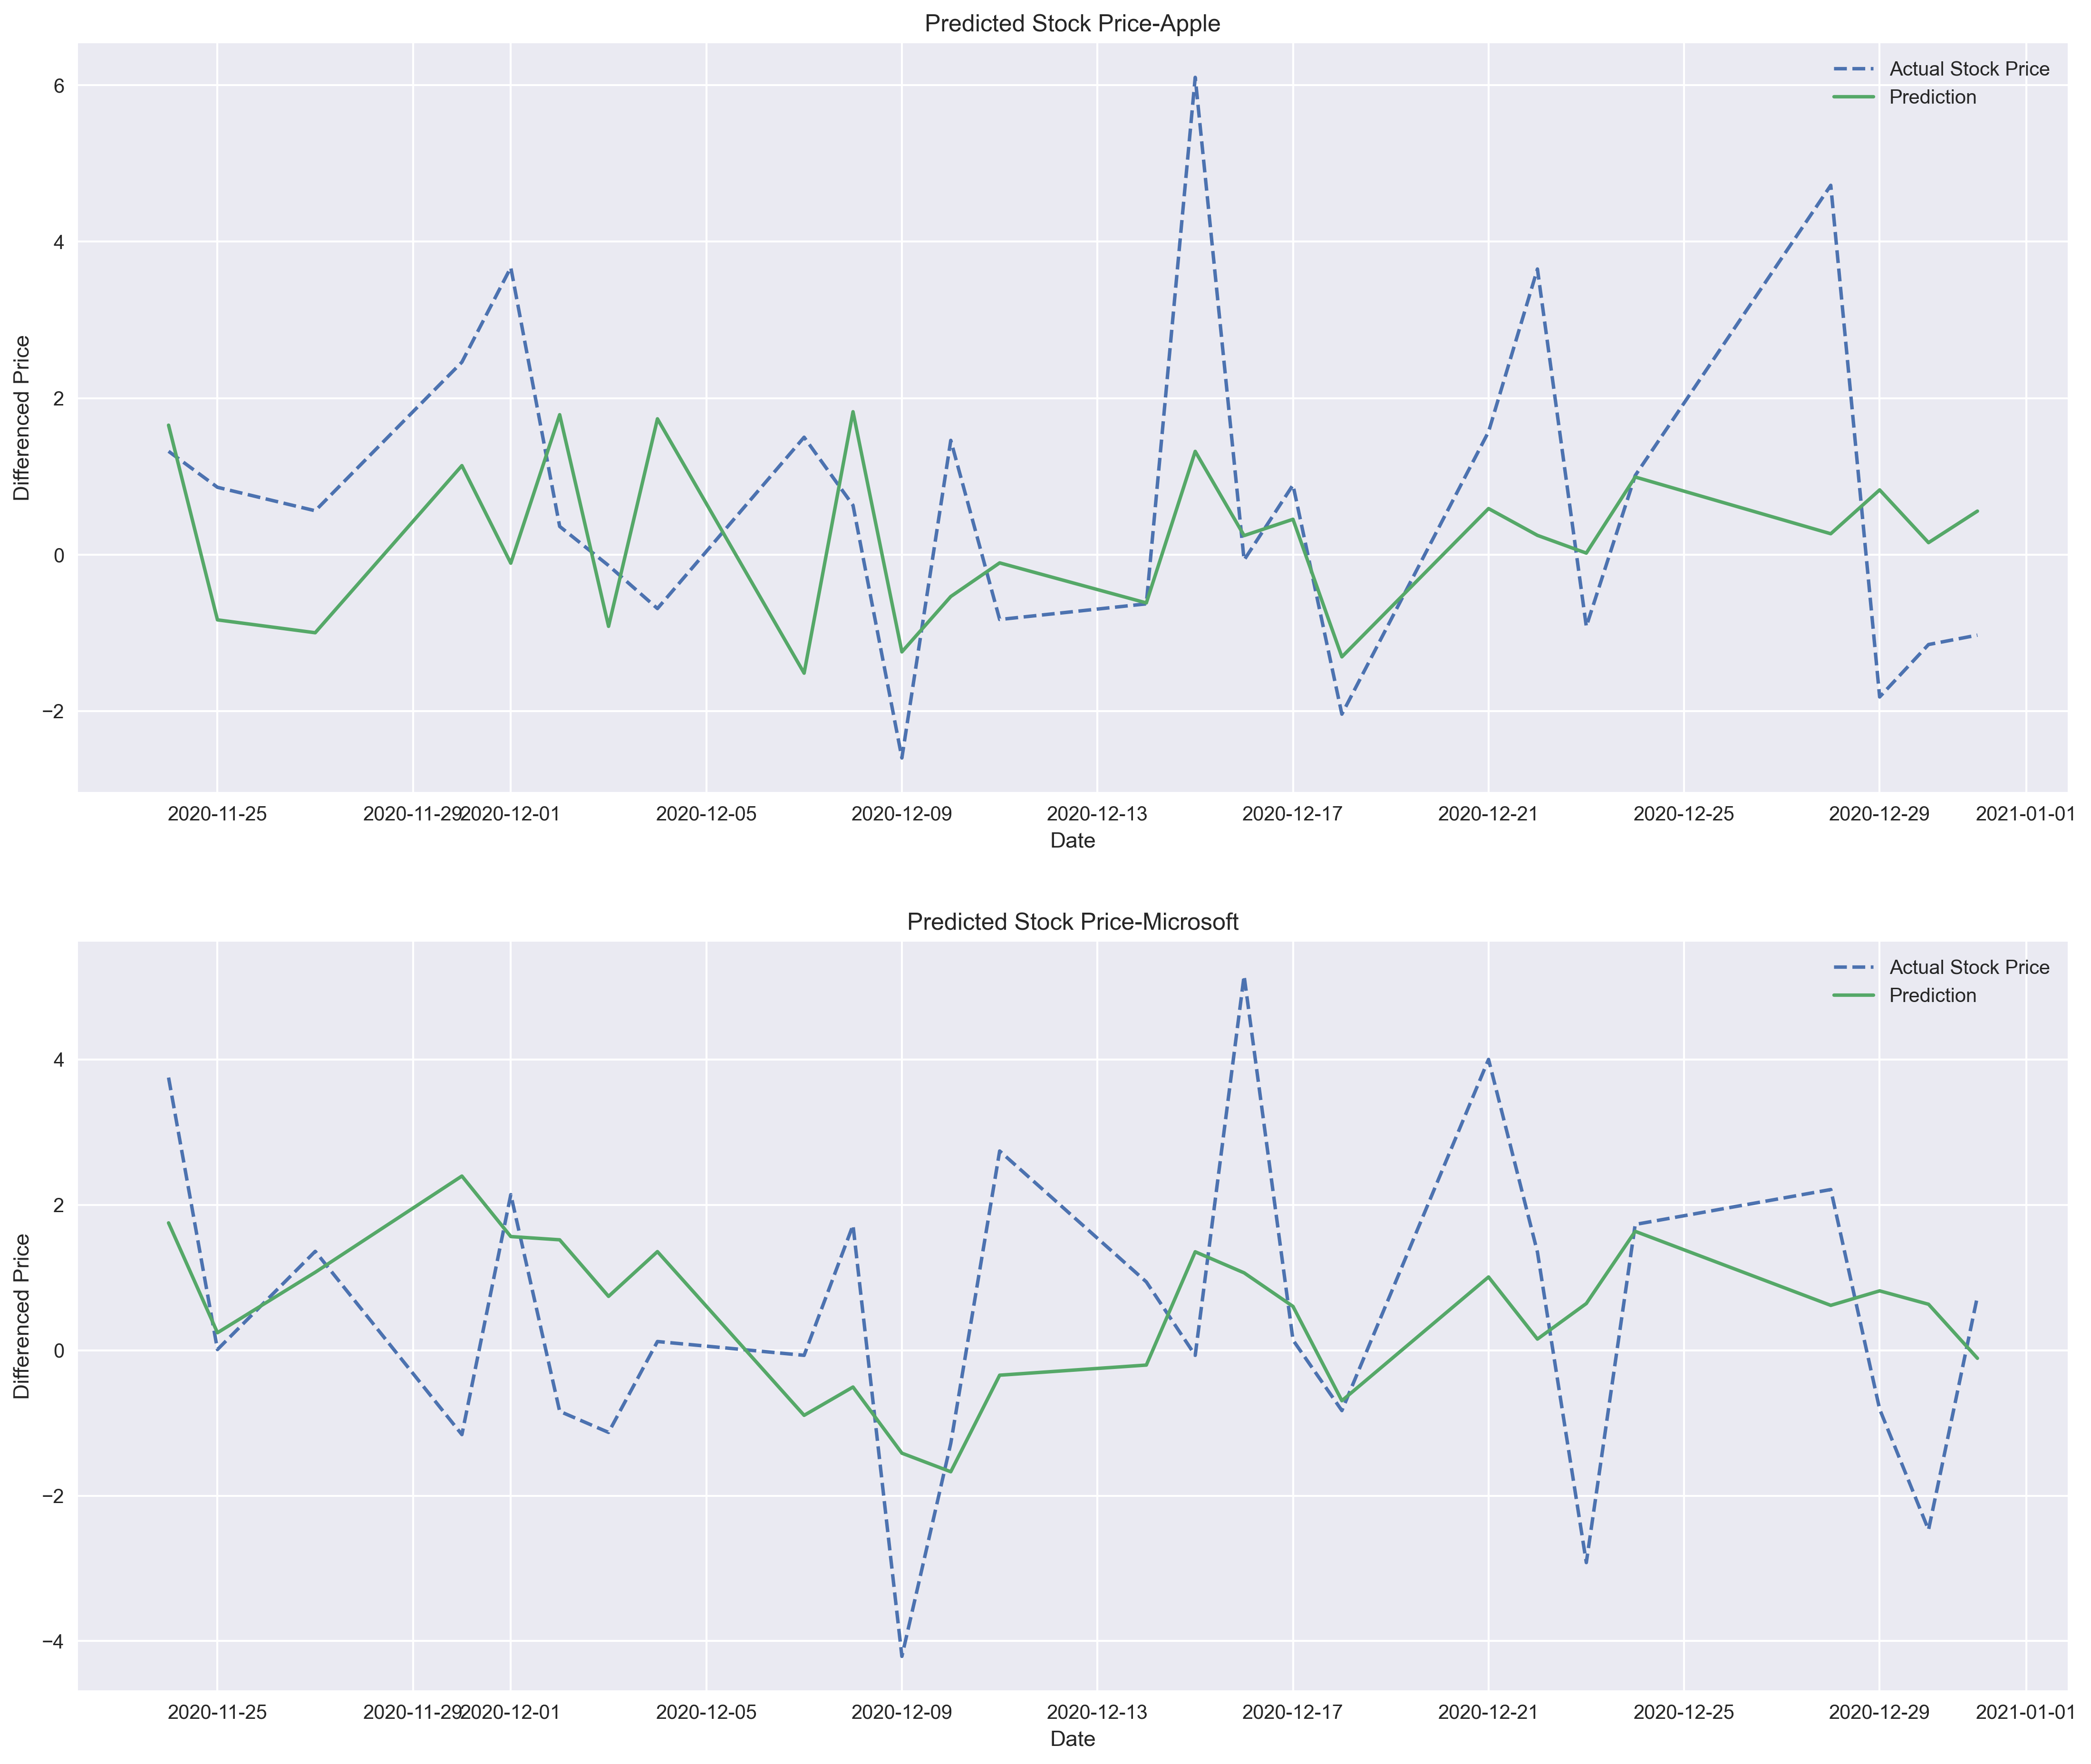

In [48]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(ar_predictions_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(ar_predictions_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

## ARIMA Model

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
split = int(len(stock_prices['AAPL'].values) * 0.95)
train_aapl = stock_prices['AAPL'].iloc[:split]
test_aapl = stock_prices['AAPL'].iloc[split:]
train_msft = stock_prices['MSFT'].iloc[:split]
test_msft = stock_prices['MSFT'].iloc[split:]

In [55]:
arima_aapl = ARIMA(train_aapl,order=(9, 1, 9))
arima_fit_aapl = arima_aapl.fit()

In [56]:
arima_msft = ARIMA(train_msft, order=(6, 1, 6))
arima_fit_msft = arima_msft.fit()

In [57]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  + len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [58]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

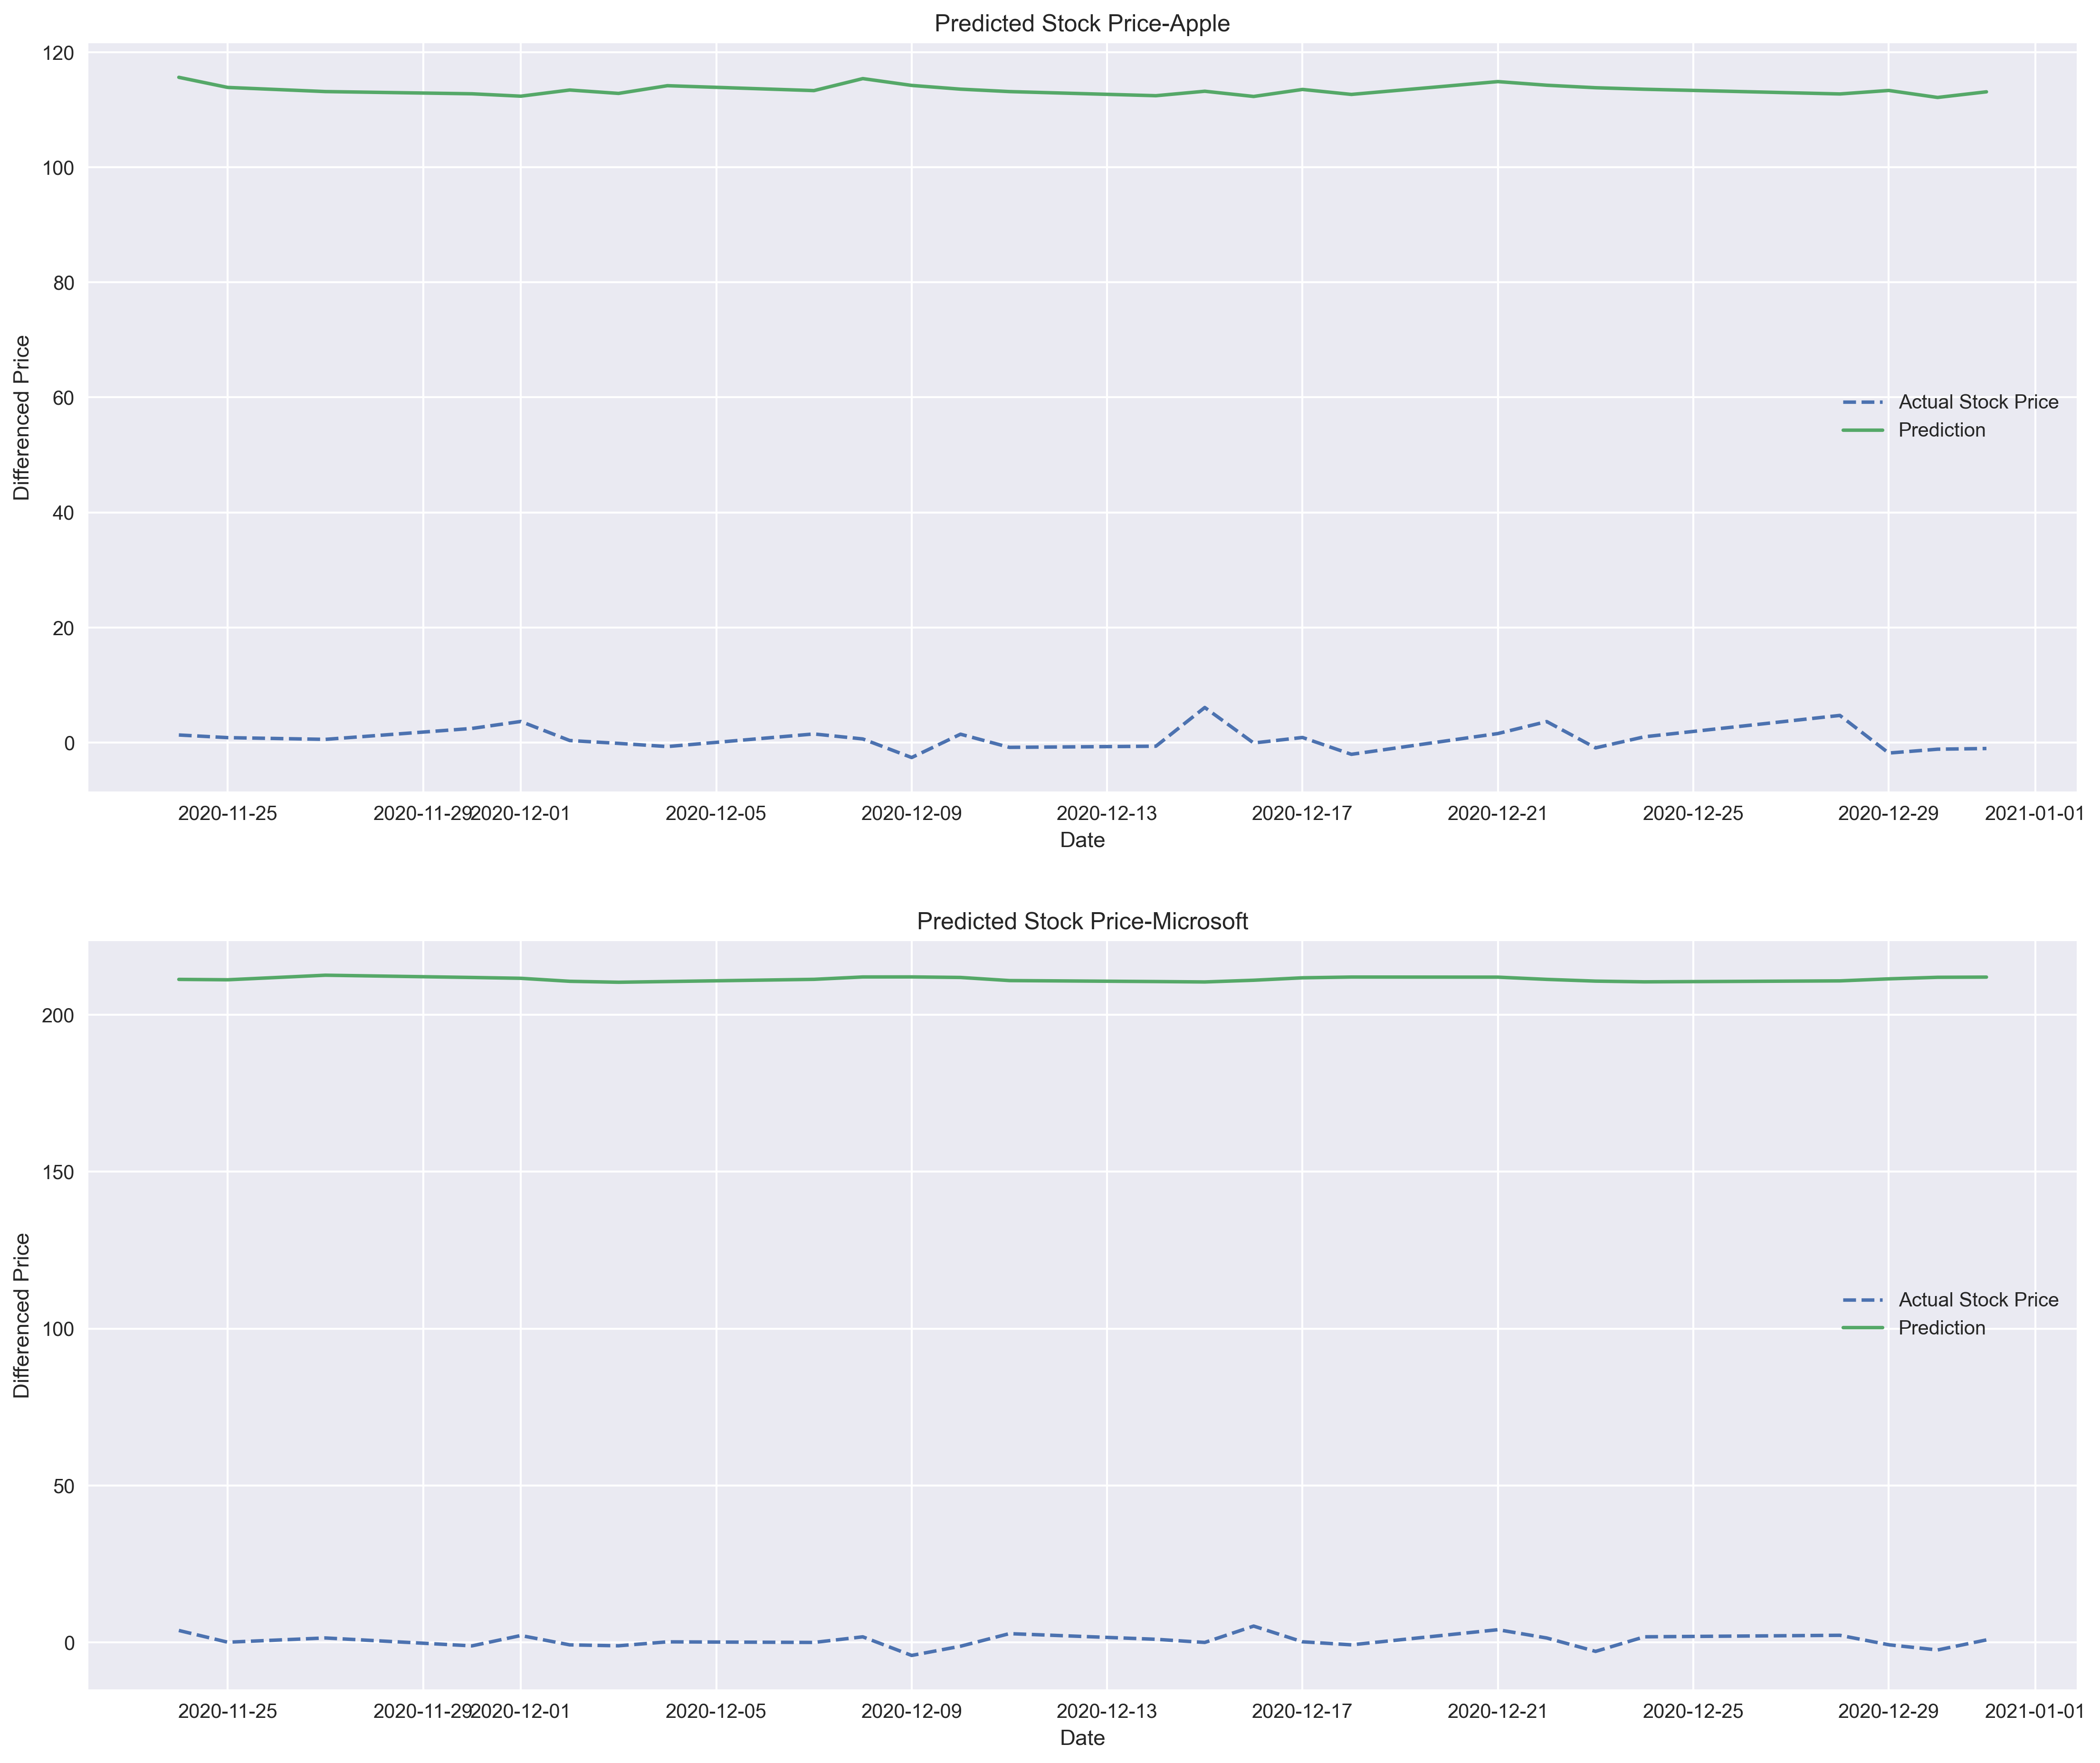

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()


In [60]:
import itertools

In [61]:
p = q = range(0, 9)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_aapl = []
for param_set in pdq:
    try:
        arima_aapl = ARIMA(train_aapl, order=param_set)
        arima_fitted_aapl = arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
      .format(pd.DataFrame(arima_results_aapl)
             .where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0], 
             pdq[arima_results_aapl.index(min(arima_results_aapl))]))

**************************************************
The Lowest AIC score is 1949.9271 and the corresponding parameters are (4, 1, 4)


In [62]:
arima_aapl = ARIMA(train_aapl, order=(4, 1, 4))
arima_fit_aapl = arima_aapl.fit()

In [63]:
p = q = range(0, 6)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_msft = []
for param_set in pdq:
    try:
        arima_msft = ARIMA(stock_prices['MSFT'], order=param_set)
        arima_fitted_msft = arima_msft.fit()
        arima_results_msft.append(arima_fitted_msft.aic)
    except:
        continue
print('**' * 25)
print('The lowest AIC score is {:.4f} and parameters are {}'
      .format(pd.DataFrame(arima_results_msft)
              .where(pd.DataFrame(arima_results_msft).T.notnull()\
                     .all()).min()[0], 
              pdq[arima_results_msft.index(min(arima_results_msft))]))

**************************************************
The lowest AIC score is 2644.2593 and parameters are (4, 1, 5)


In [64]:
arima_msft = ARIMA(stock_prices['MSFT'], order=(4, 2 ,4))
arima_fit_msft= arima_msft.fit()

In [65]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  +len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [66]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

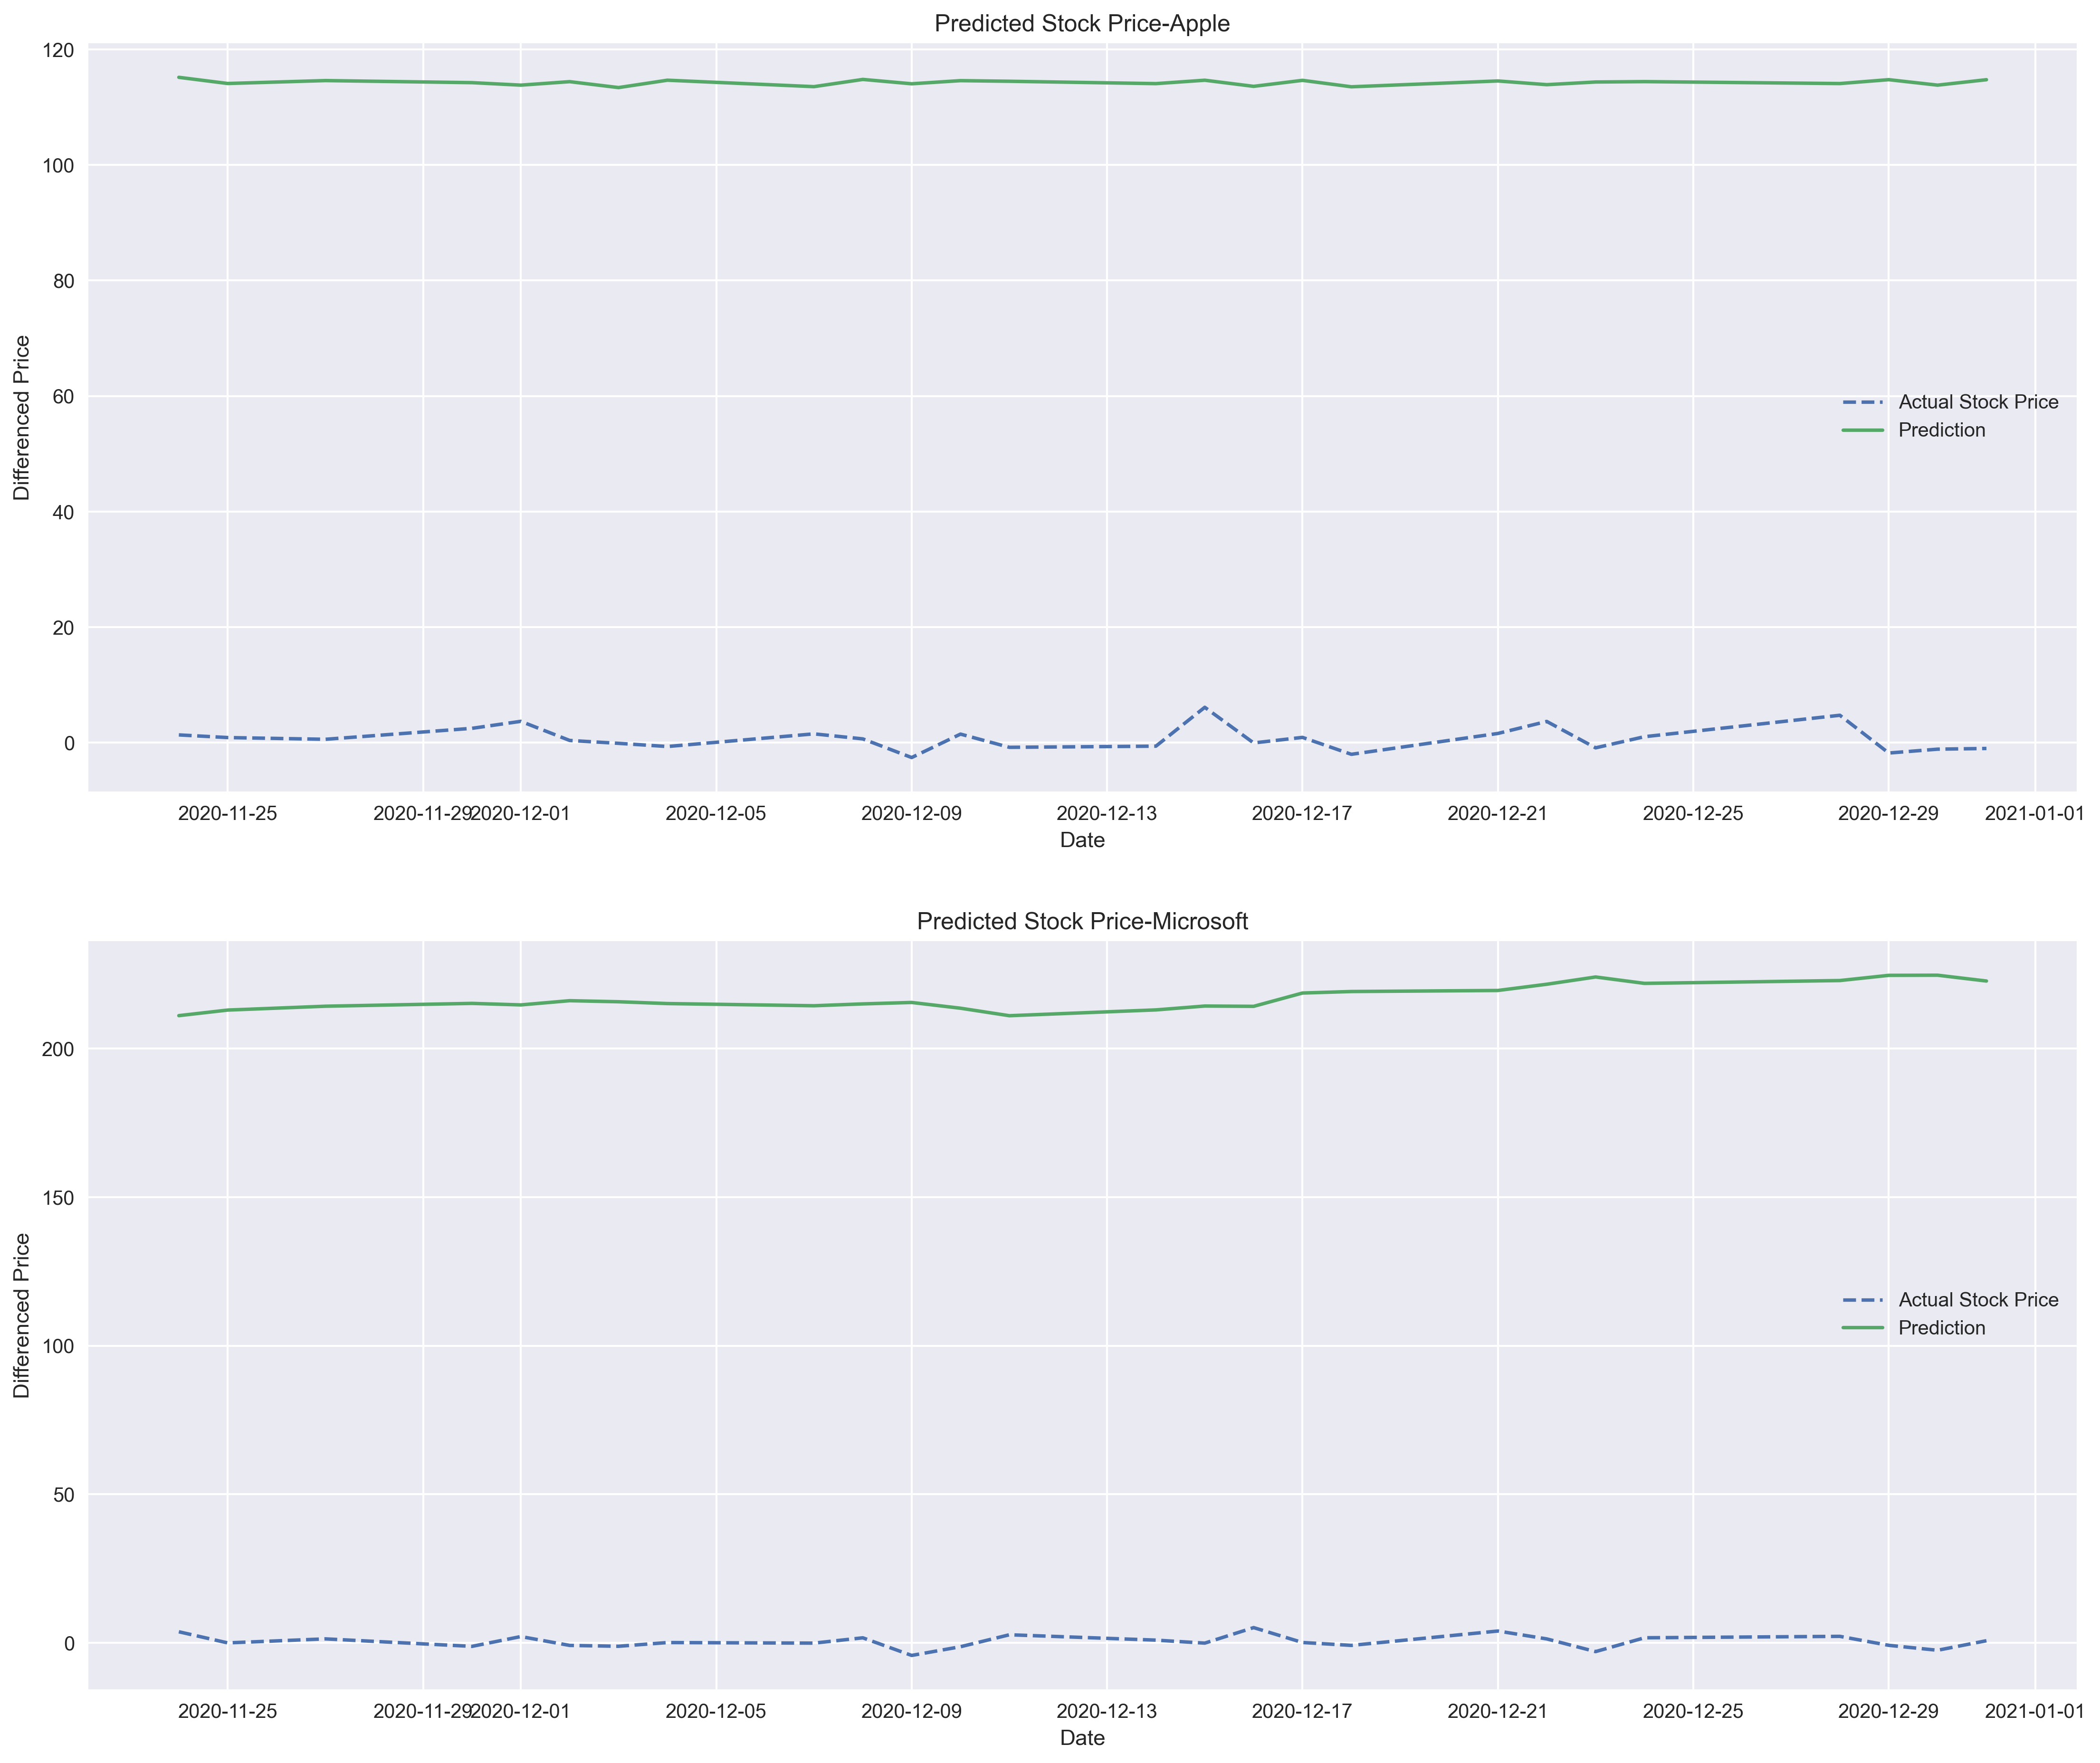

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()